In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [80]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [81]:
mobile_sales.DATE.describe()

C:\Users\khush\AppData\Local\Temp\ipykernel_20132\20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [82]:
18*12

216

In [83]:
# set the timeperiod as index 
mobile_sales.set_index('DATE', inplace=True)

<Axes: xlabel='DATE'>

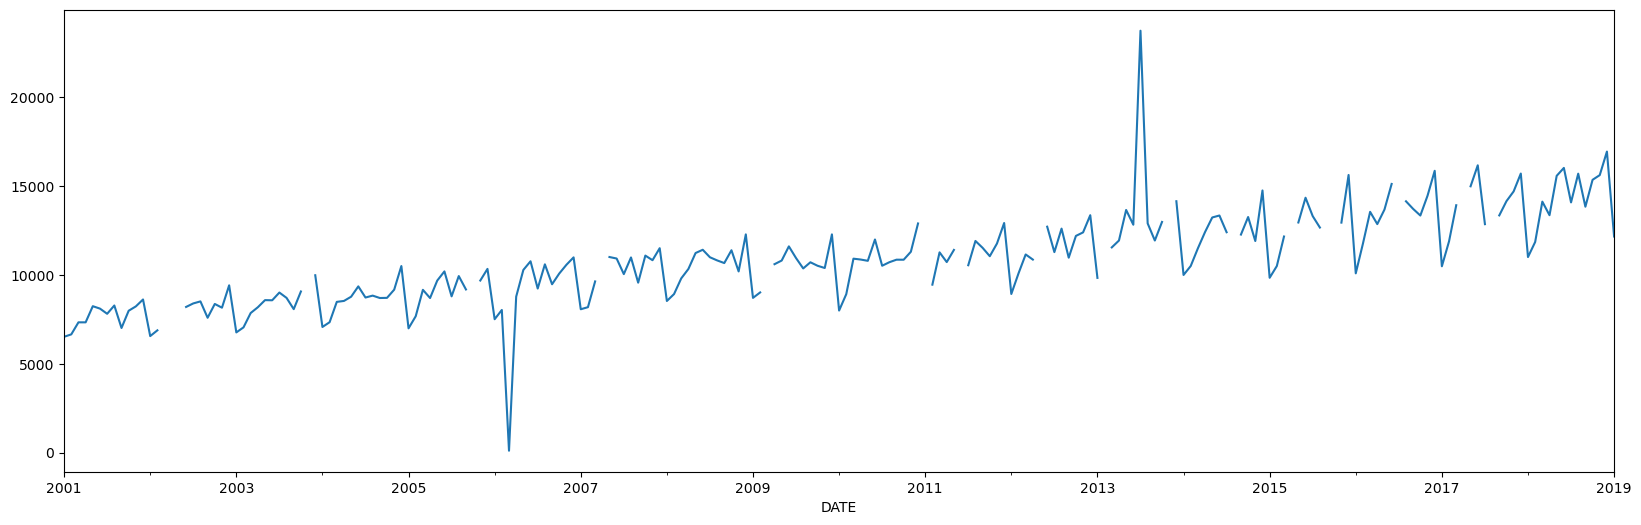

In [84]:
mobile_sales.Sales.plot()

In [85]:
mn = mobile_sales.Sales.mean()

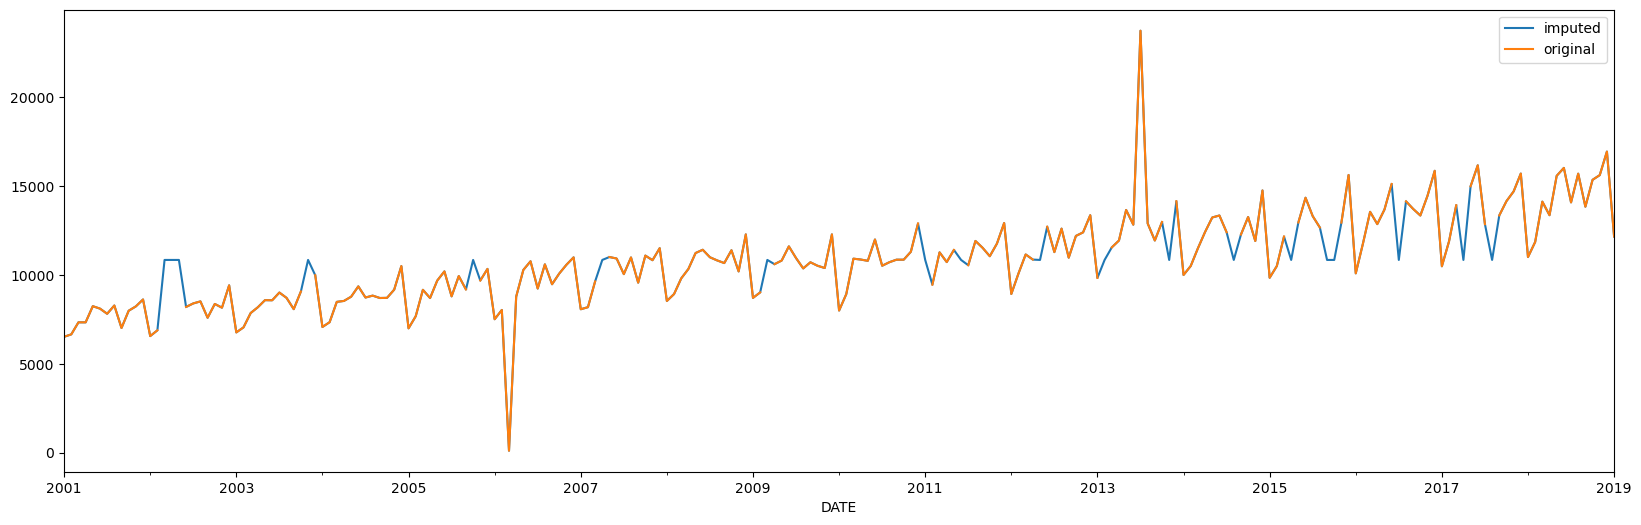

In [86]:
mobile_sales.Sales.fillna(mn).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

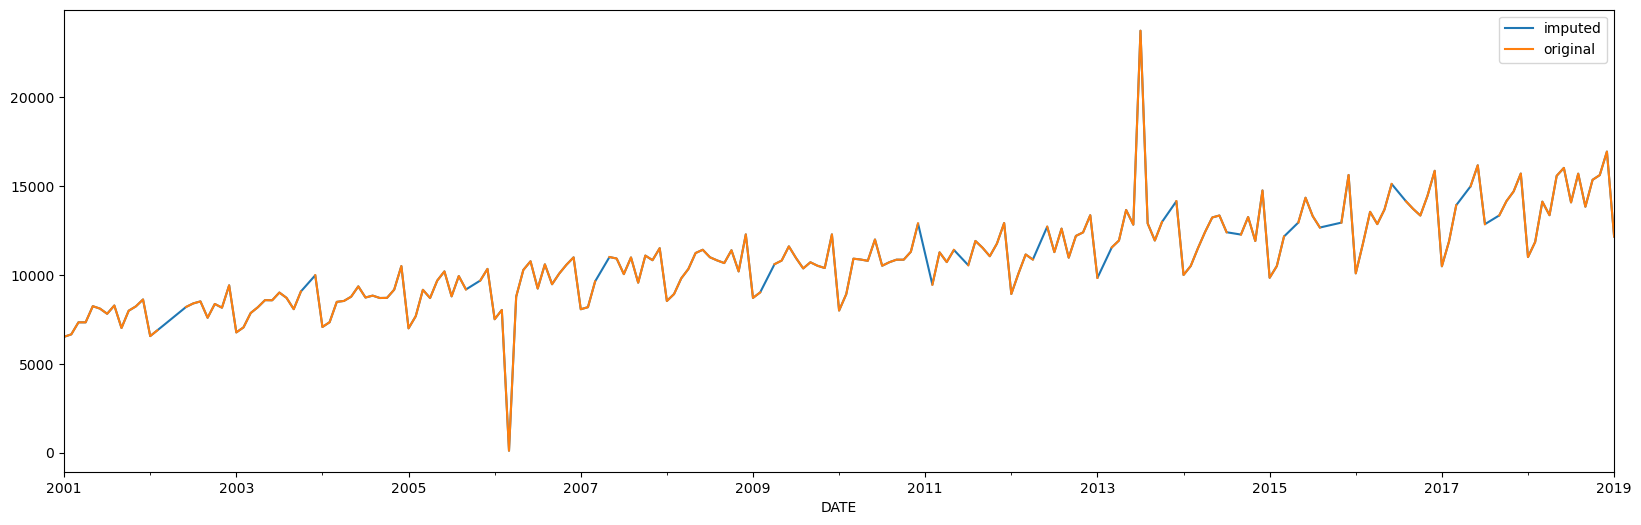

In [87]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

[]

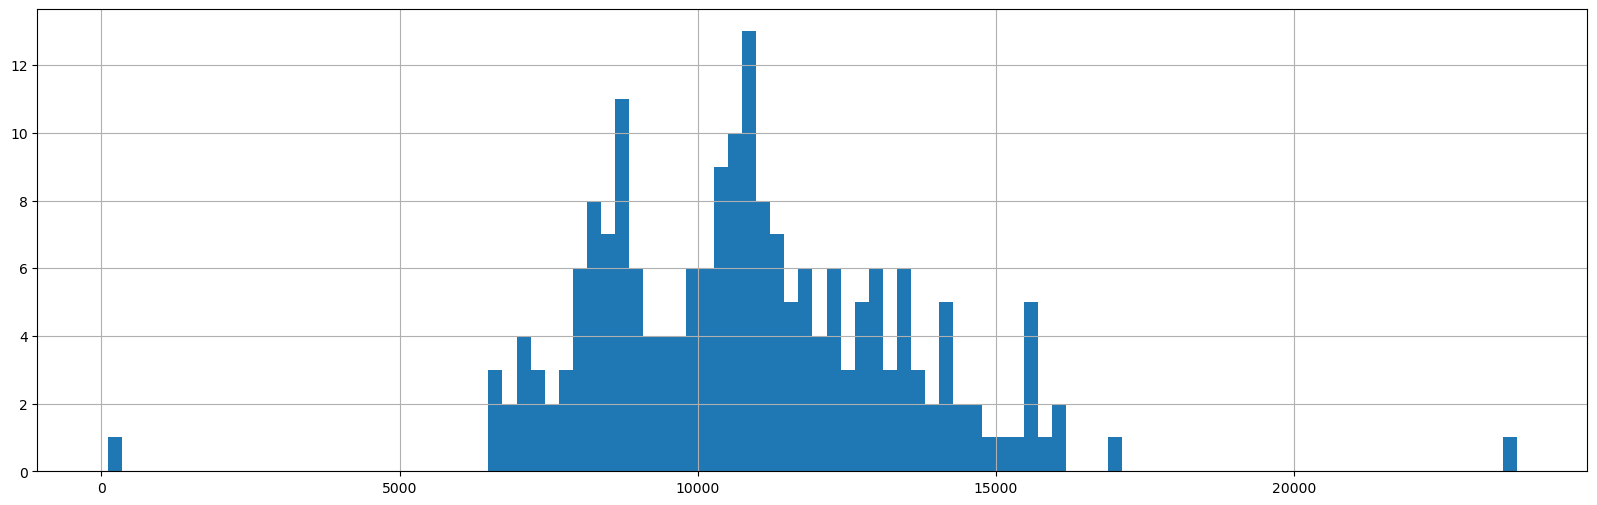

In [88]:
mobile_sales.Sales.hist(bins=100).plot()

In [89]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

<Axes: xlabel='DATE'>

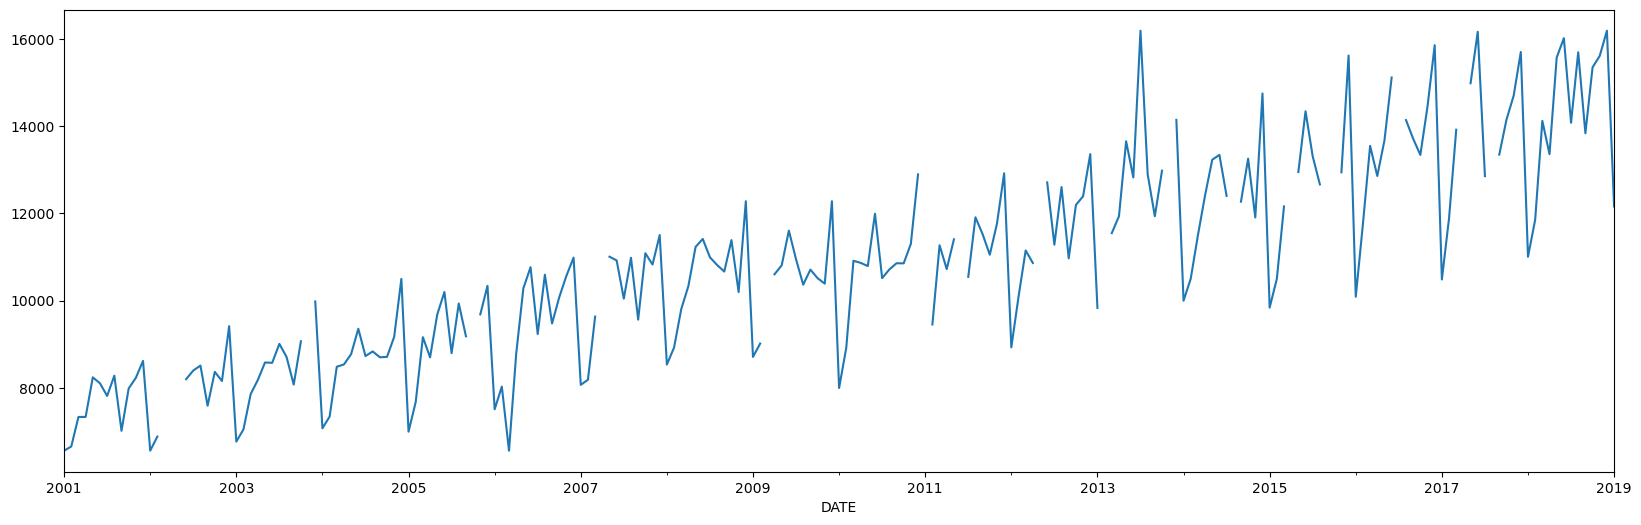

In [90]:
mobile_sales.Sales.plot(label='Clipped')

<Axes: xlabel='DATE'>

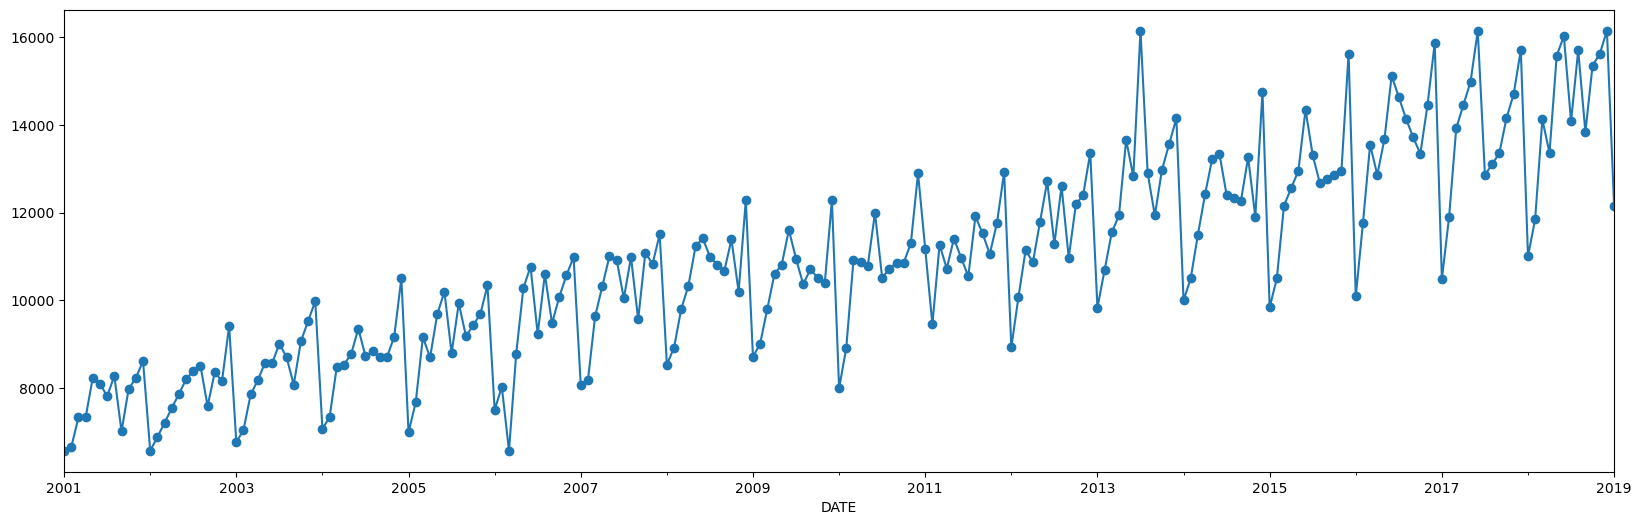

In [91]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

<Axes: xlabel='DATE'>

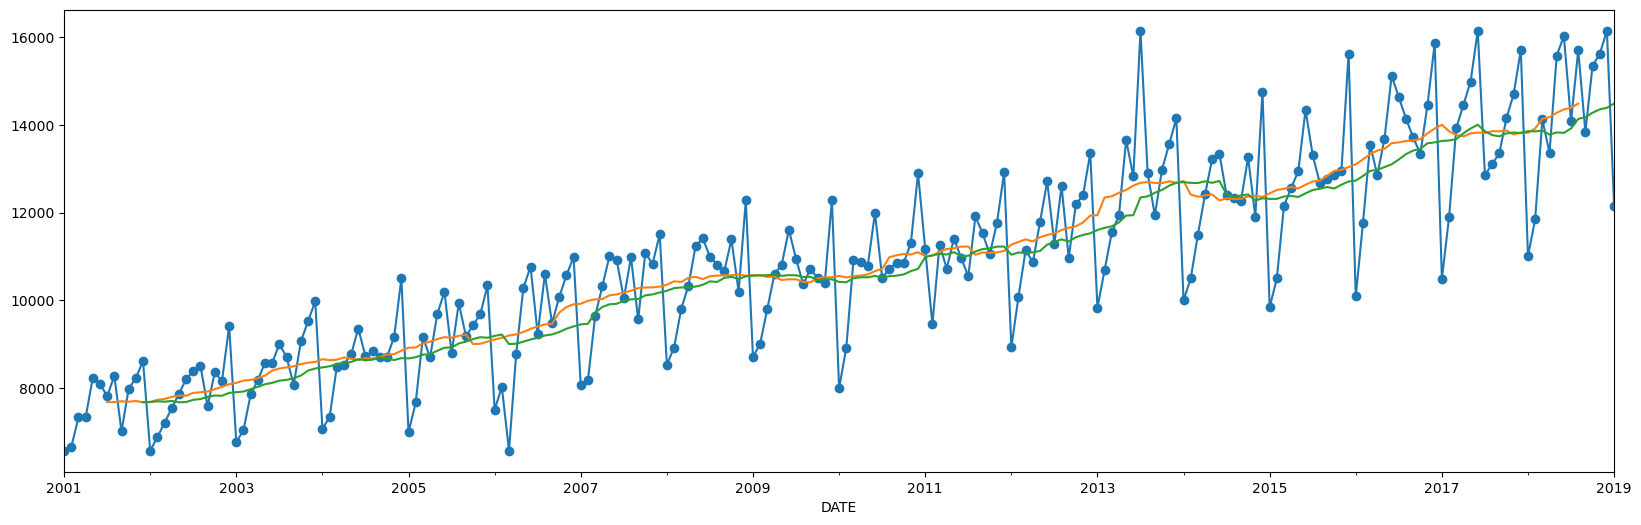

In [92]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12, center=True).mean().plot()
mobile_sales.Sales.rolling(12, center=False).mean().plot()

In [93]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

In [94]:
plt.rcParams['figure.figsize'] = (20, 10)

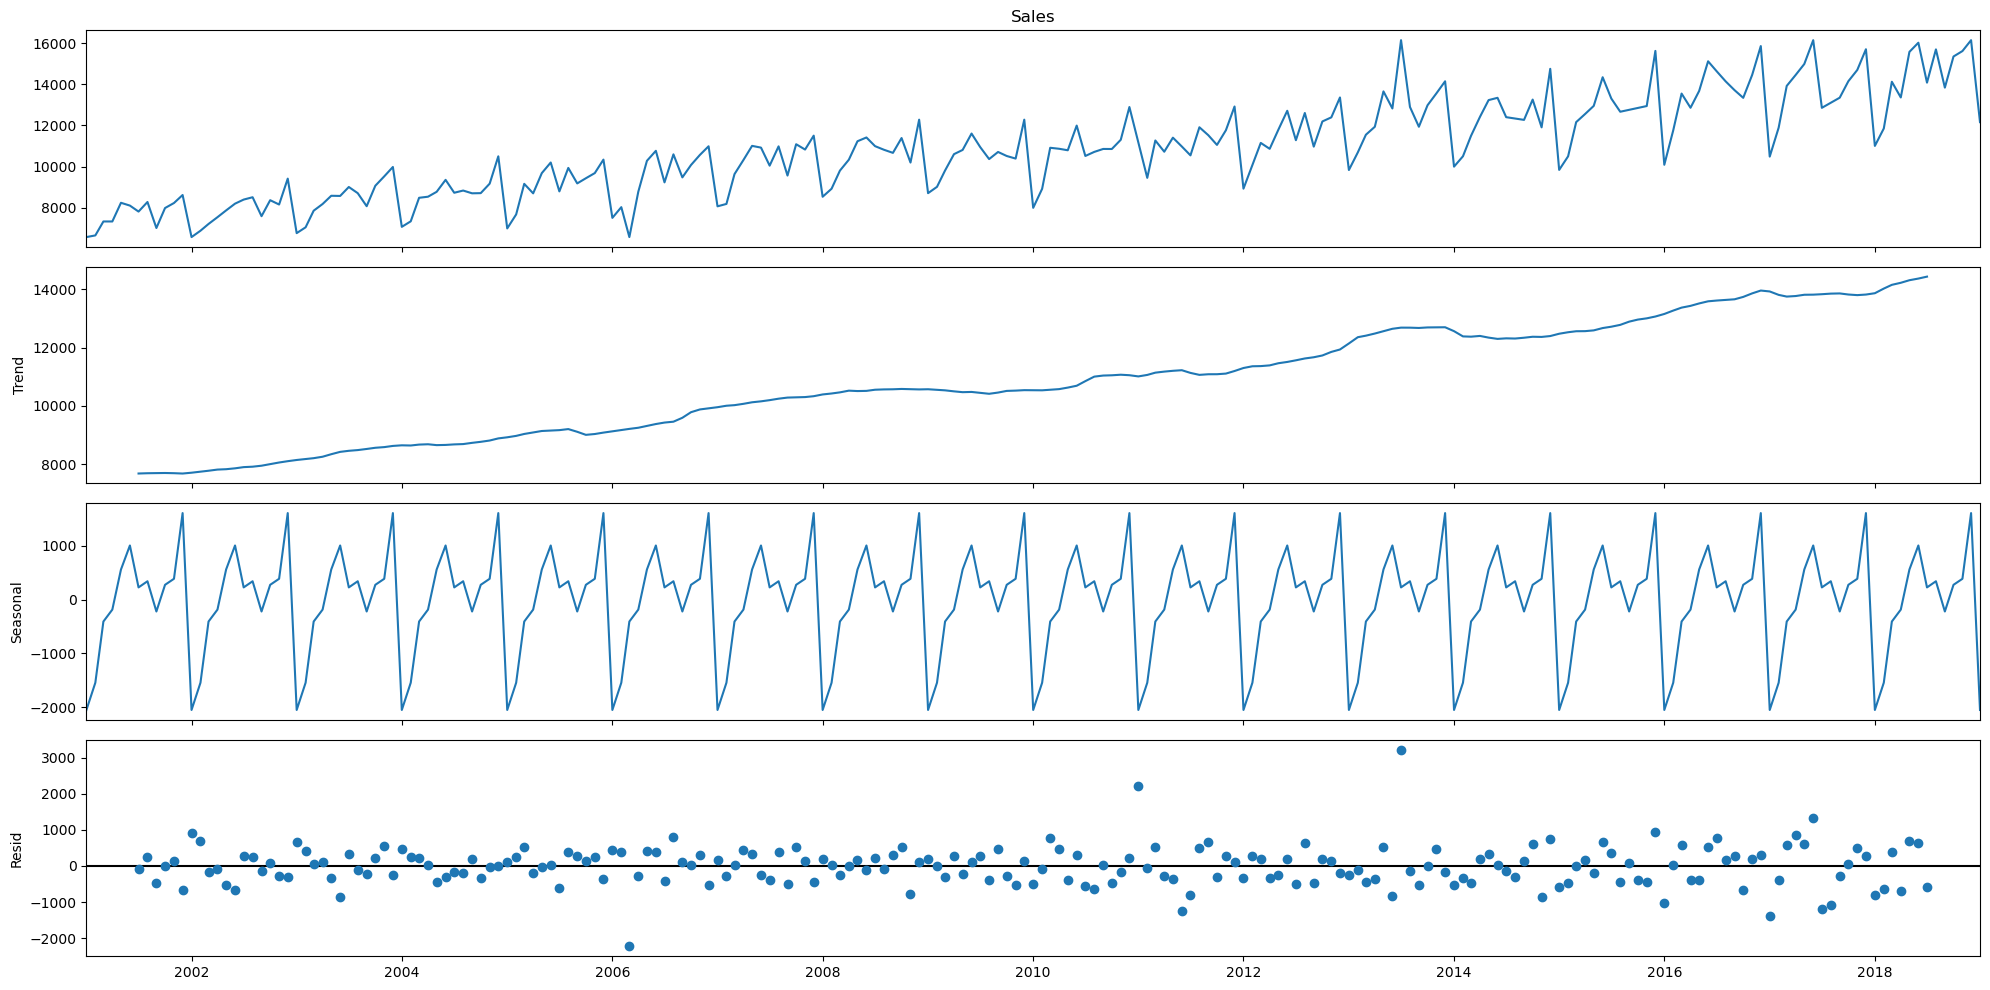

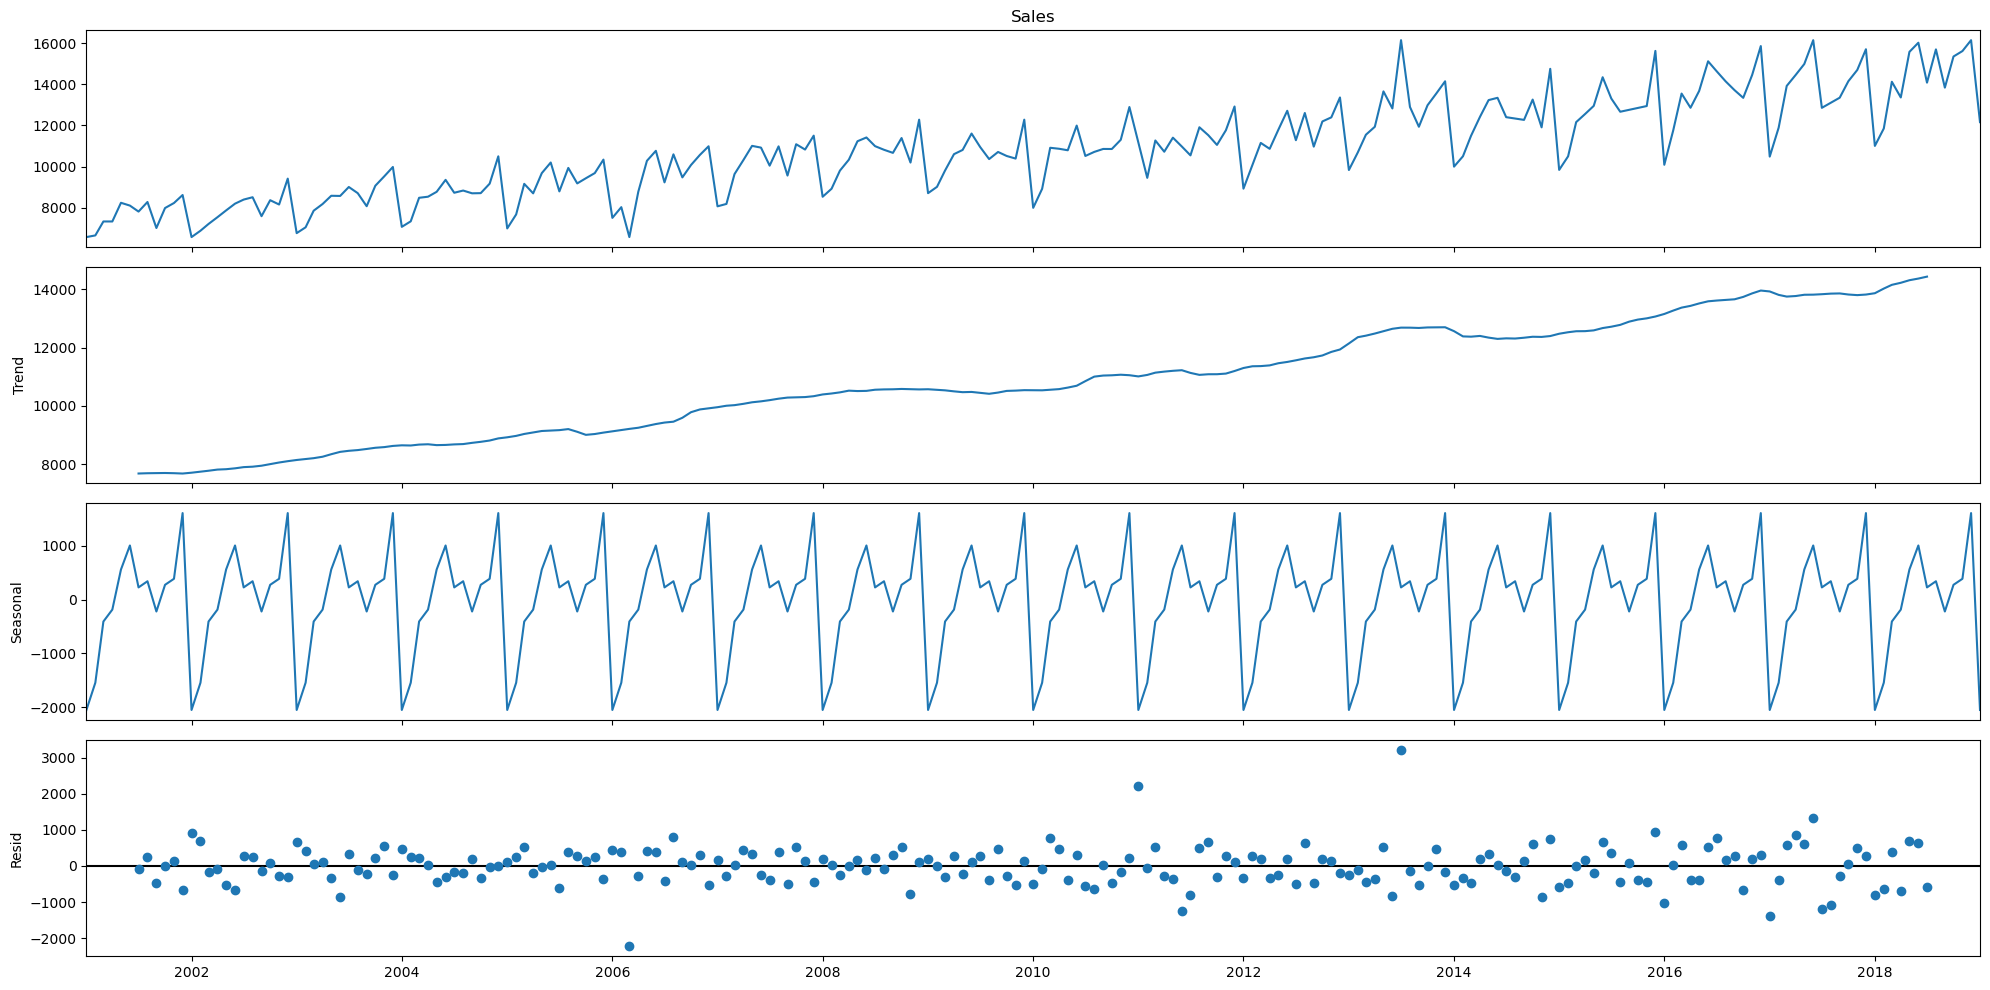

In [95]:
model.plot()

In [96]:
model.trend[-10:-5]

DATE
2018-04-01    14225.375000
2018-05-01    14313.625000
2018-06-01    14370.186667
2018-07-01    14436.665000
2018-08-01             NaN
Name: trend, dtype: float64

In [97]:
model.seasonal[-10:-5]

DATE
2018-04-01    -185.047675
2018-05-01     559.648403
2018-06-01    1006.155854
2018-07-01     227.369231
2018-08-01     341.476835
Name: seasonal, dtype: float64

In [98]:
model.resid[-10:-5]

DATE
2018-04-01   -680.327325
2018-05-01    702.726597
2018-06-01    644.657479
2018-07-01   -584.034231
2018-08-01           NaN
Name: resid, dtype: float64

In [99]:
mobile_sales.Sales[-10:-5]

DATE
2018-04-01    13360.0
2018-05-01    15576.0
2018-06-01    16021.0
2018-07-01    14080.0
2018-08-01    15697.0
Name: Sales, dtype: float64

In [100]:
14225.375000 - 185.047675 -680.327325

13360.0

In [101]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='multiplicative')

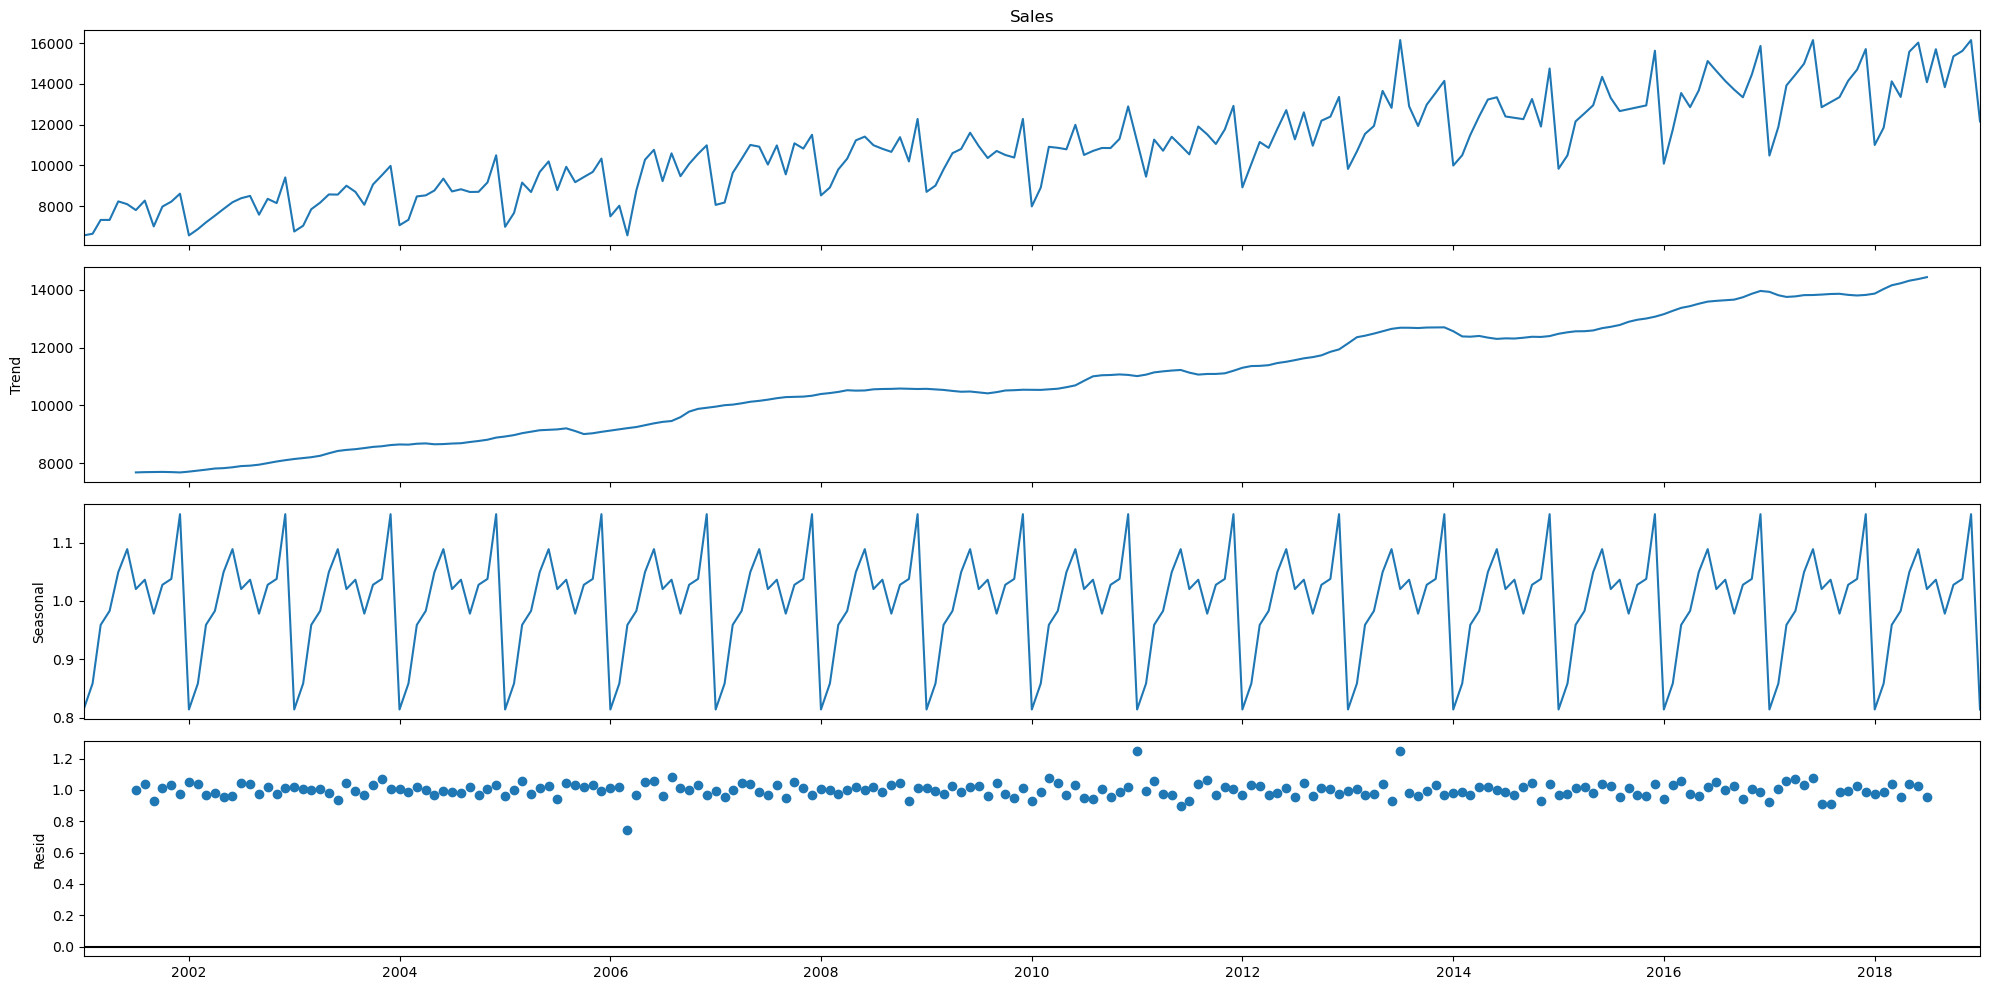

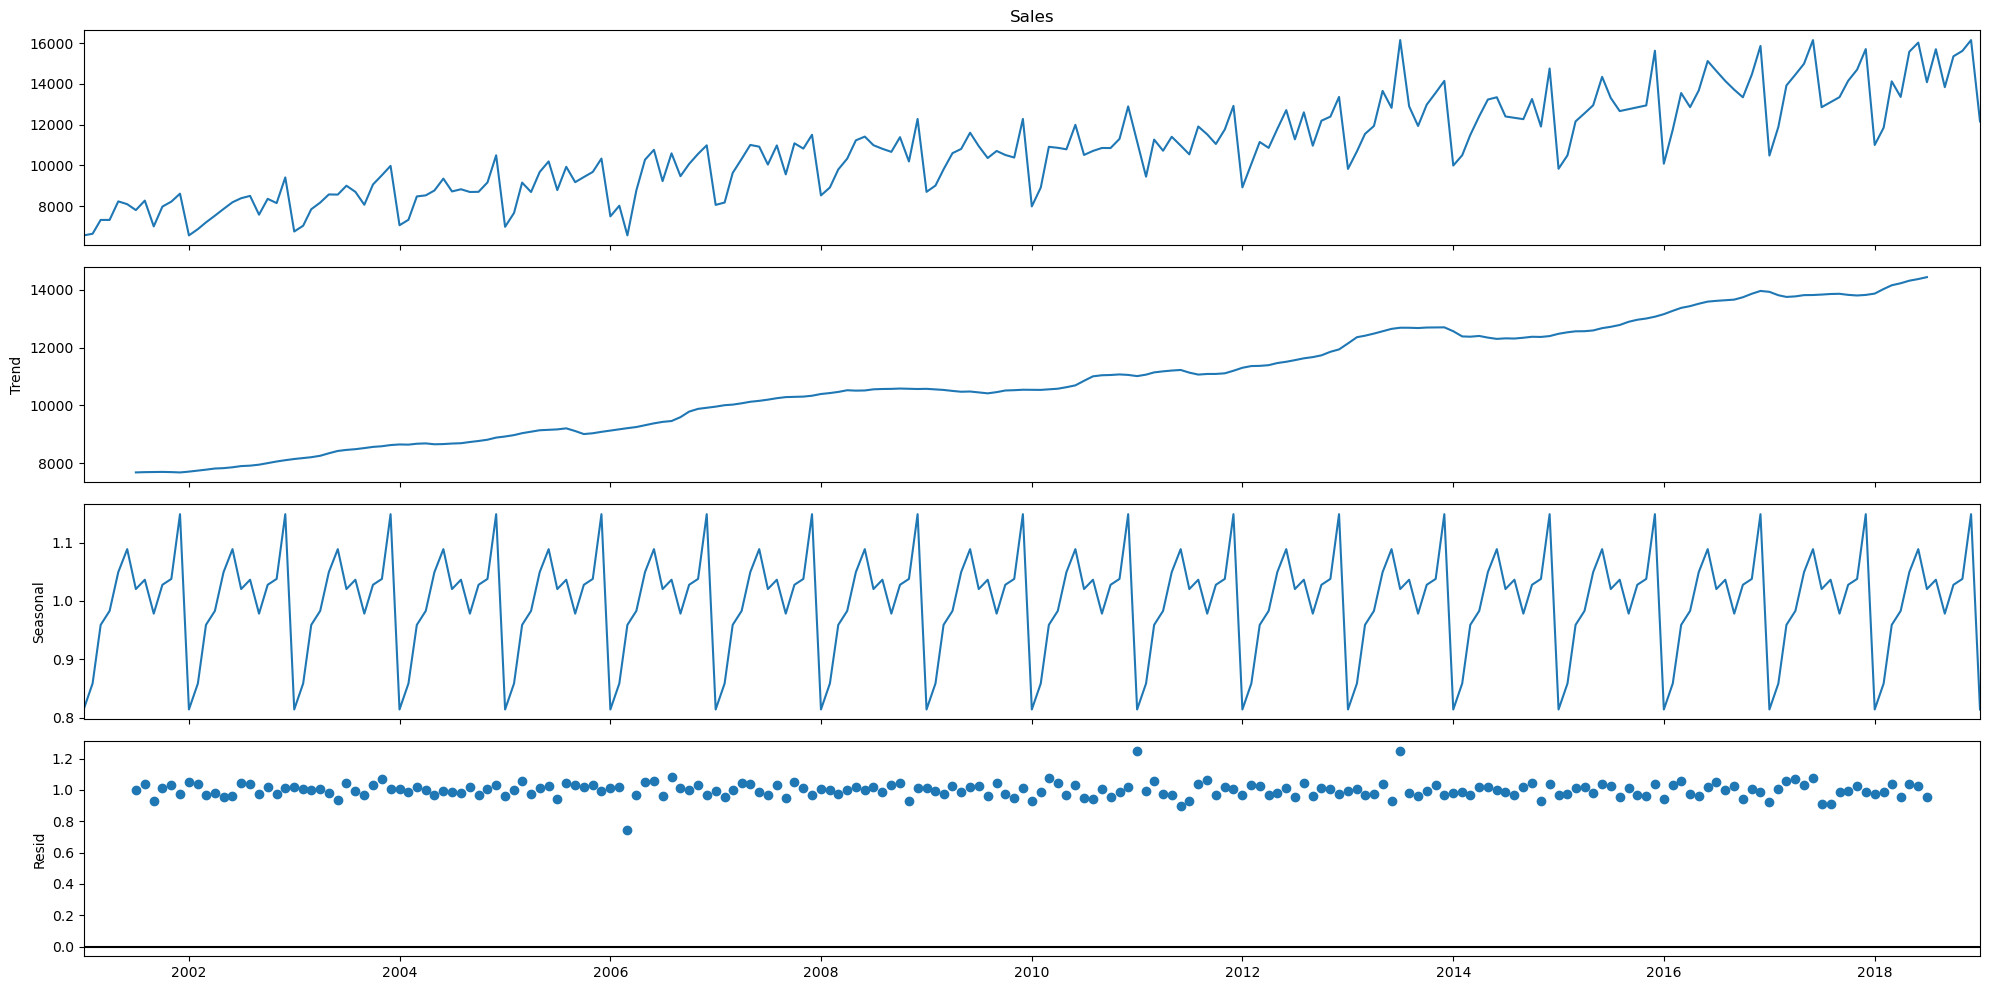

In [102]:
model.plot()

In [103]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

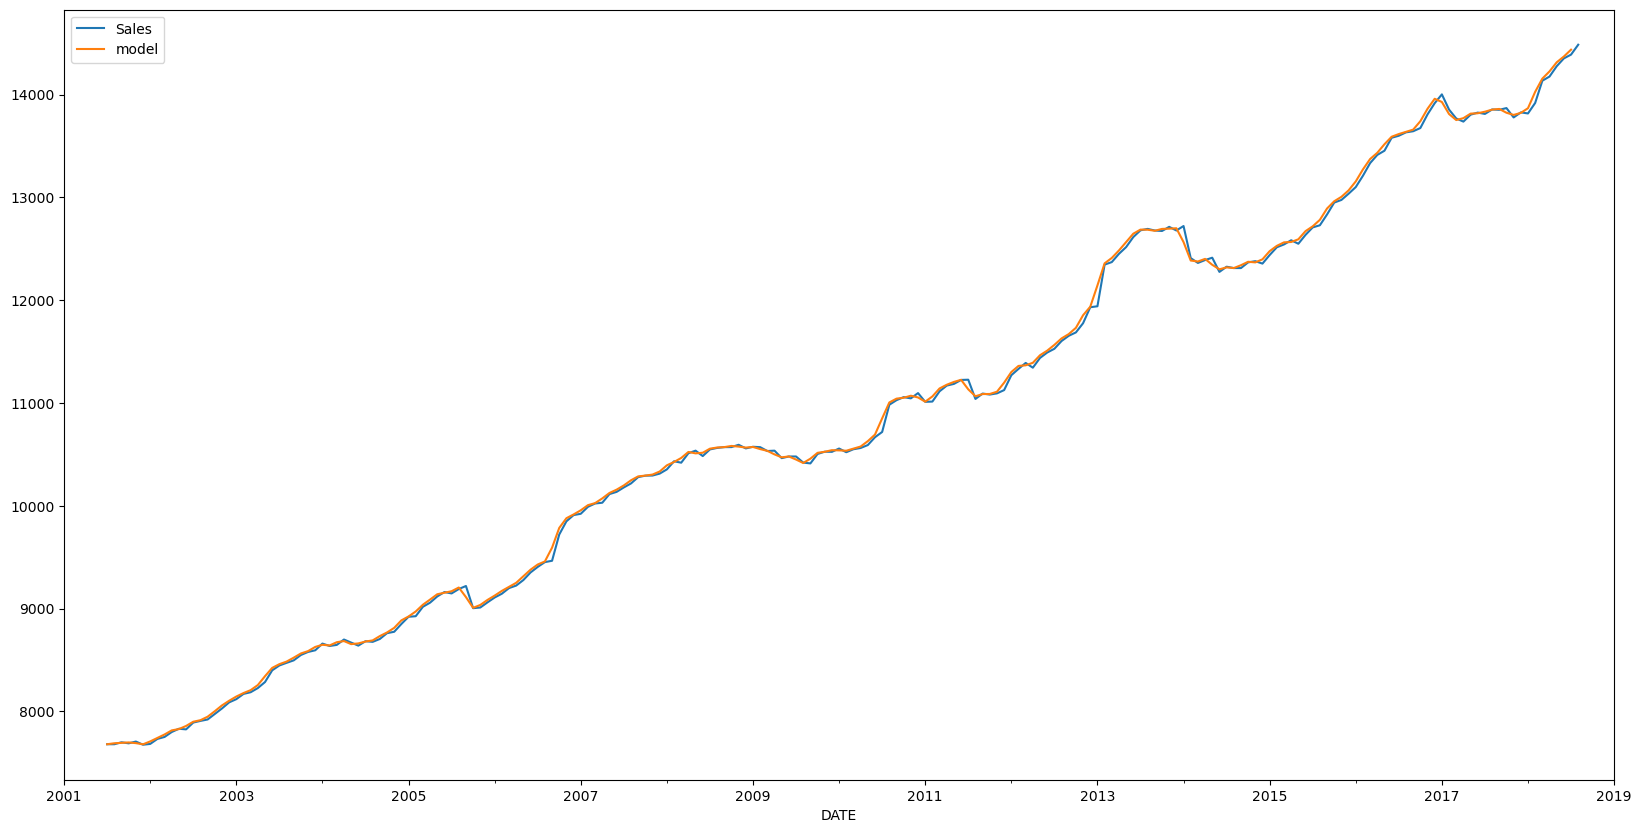

In [104]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot(label = "ma")
model.trend.plot(label = "model")
plt.legend()

<Axes: xlabel='DATE'>

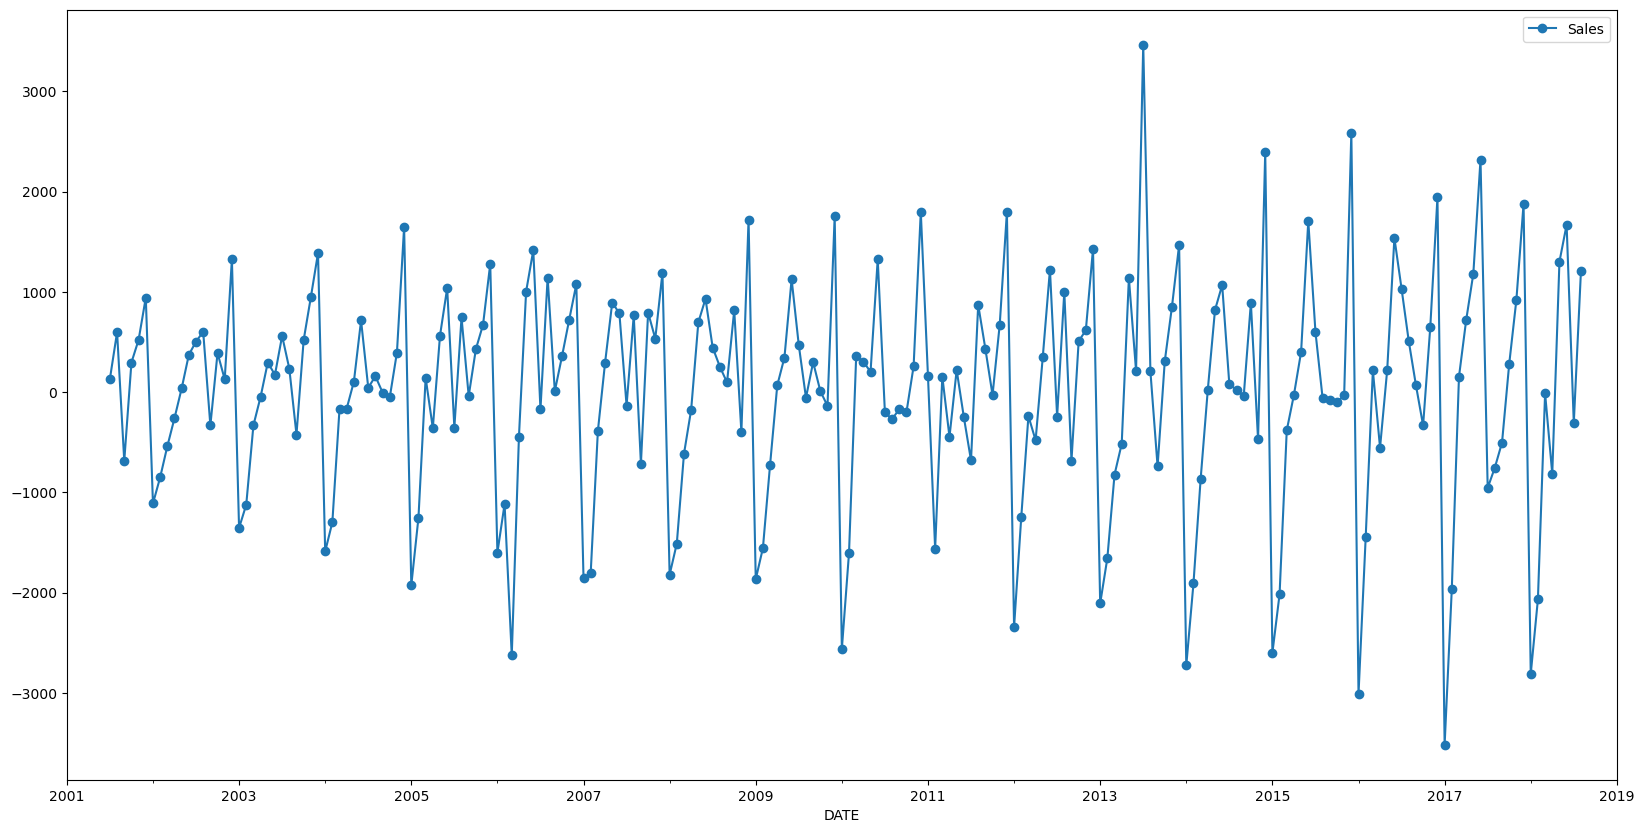

In [105]:
de_trend = mobile_sales - trend
de_trend.plot(style = "o-")

<Axes: xlabel='DATE'>

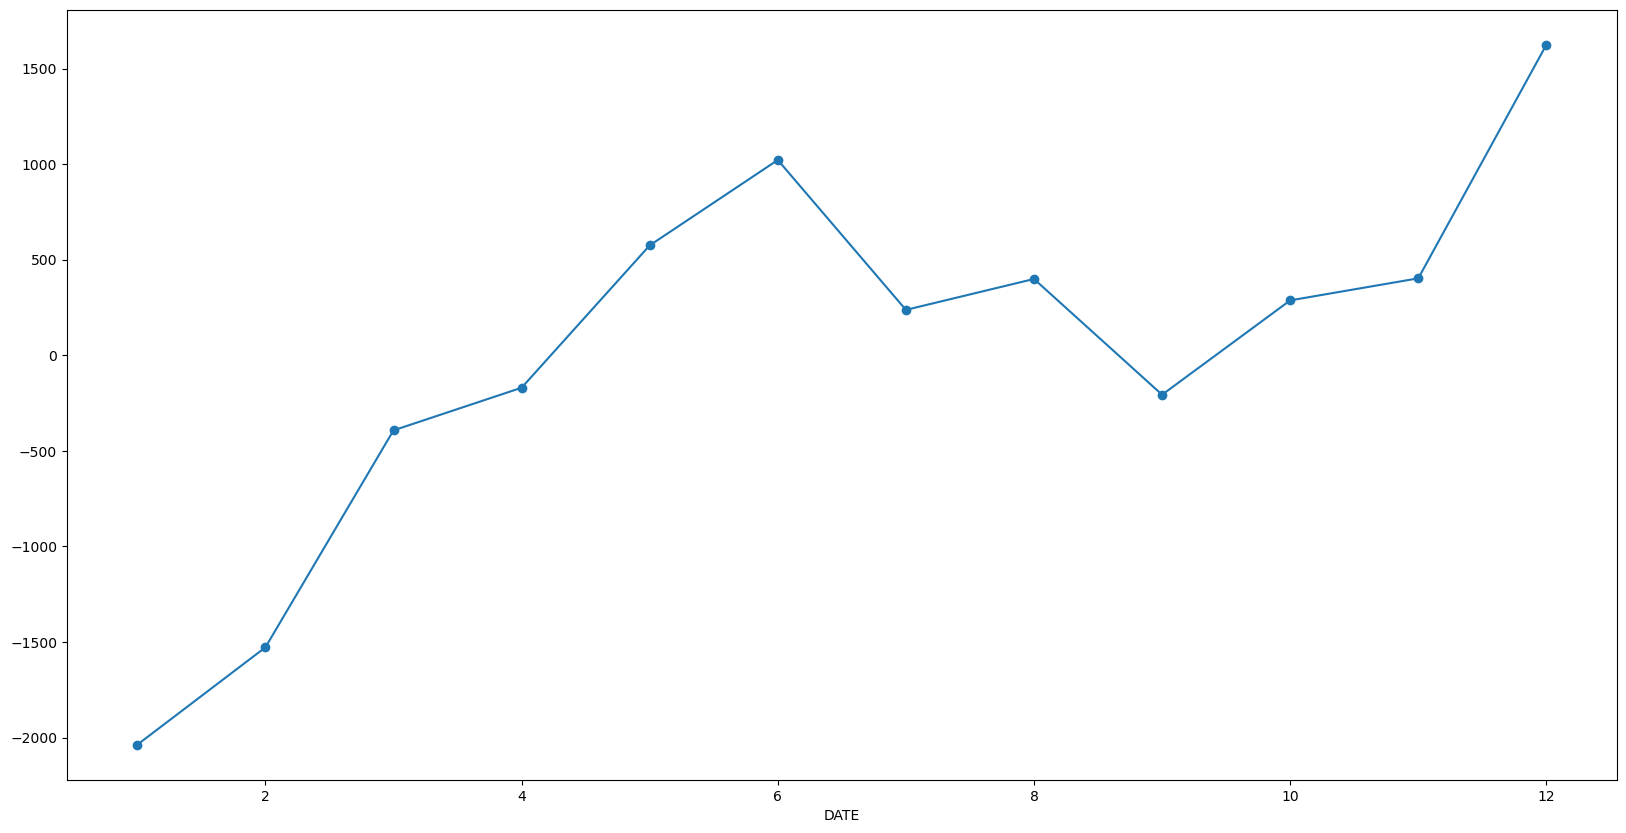

In [106]:
dtf = de_trend.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

<Axes: xlabel='DATE'>

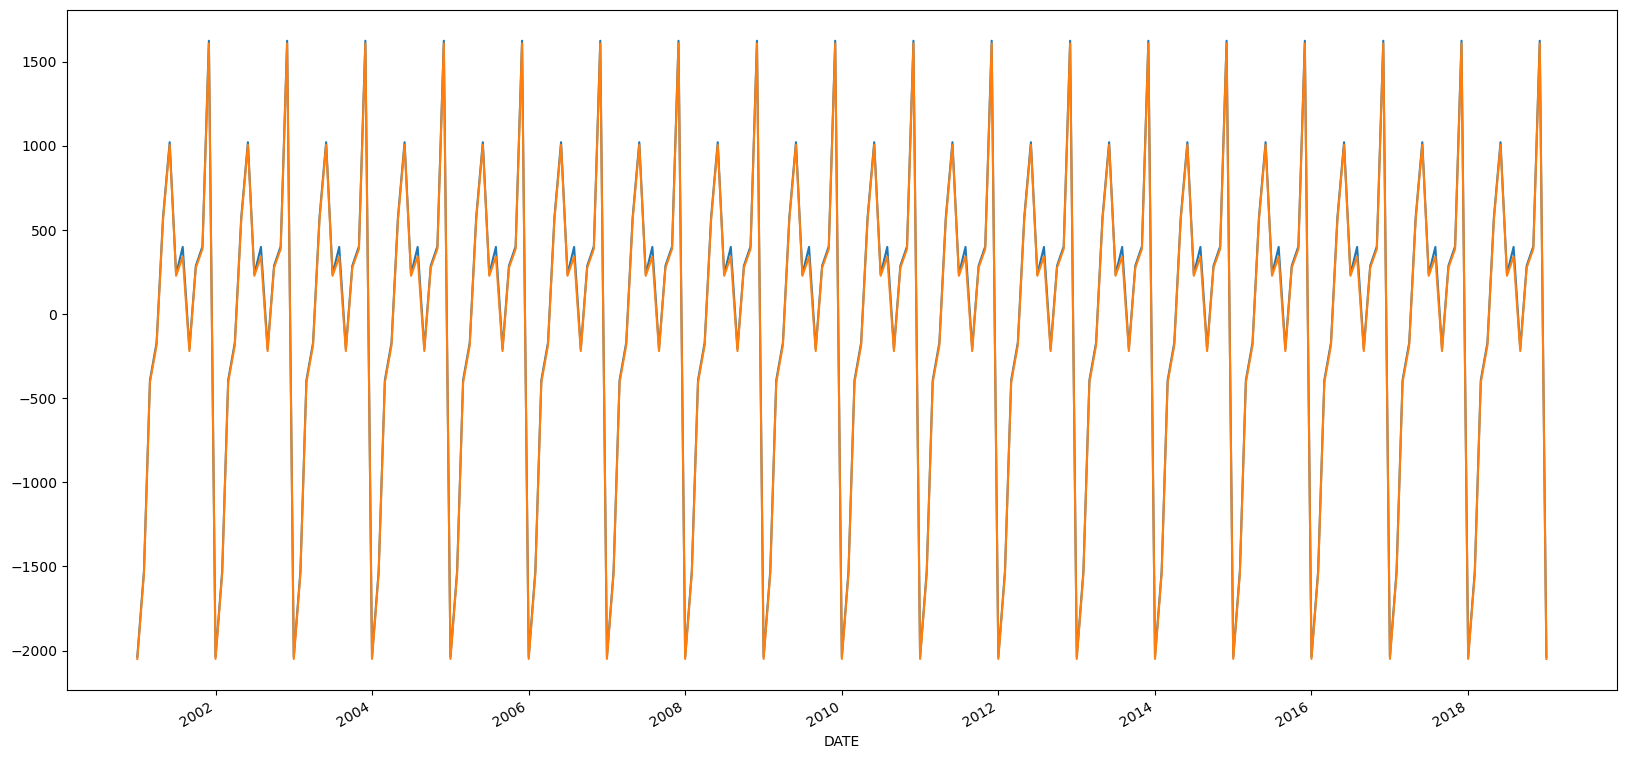

In [107]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

## SImple forecasting methods in action , train vs test performance 

In [108]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted)*100, 3))

In [109]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

Sales
DATE                
2018-02-01  11852.00
2018-03-01  14123.00
2018-04-01  13360.00
2018-05-01  15576.00
2018-06-01  16021.00
2018-07-01  14080.00
2018-08-01  15697.00
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  16144.48
2019-01-01  12160.00

MAE : 3479.79
RMSE : 3757.483
MAPE: 23.24


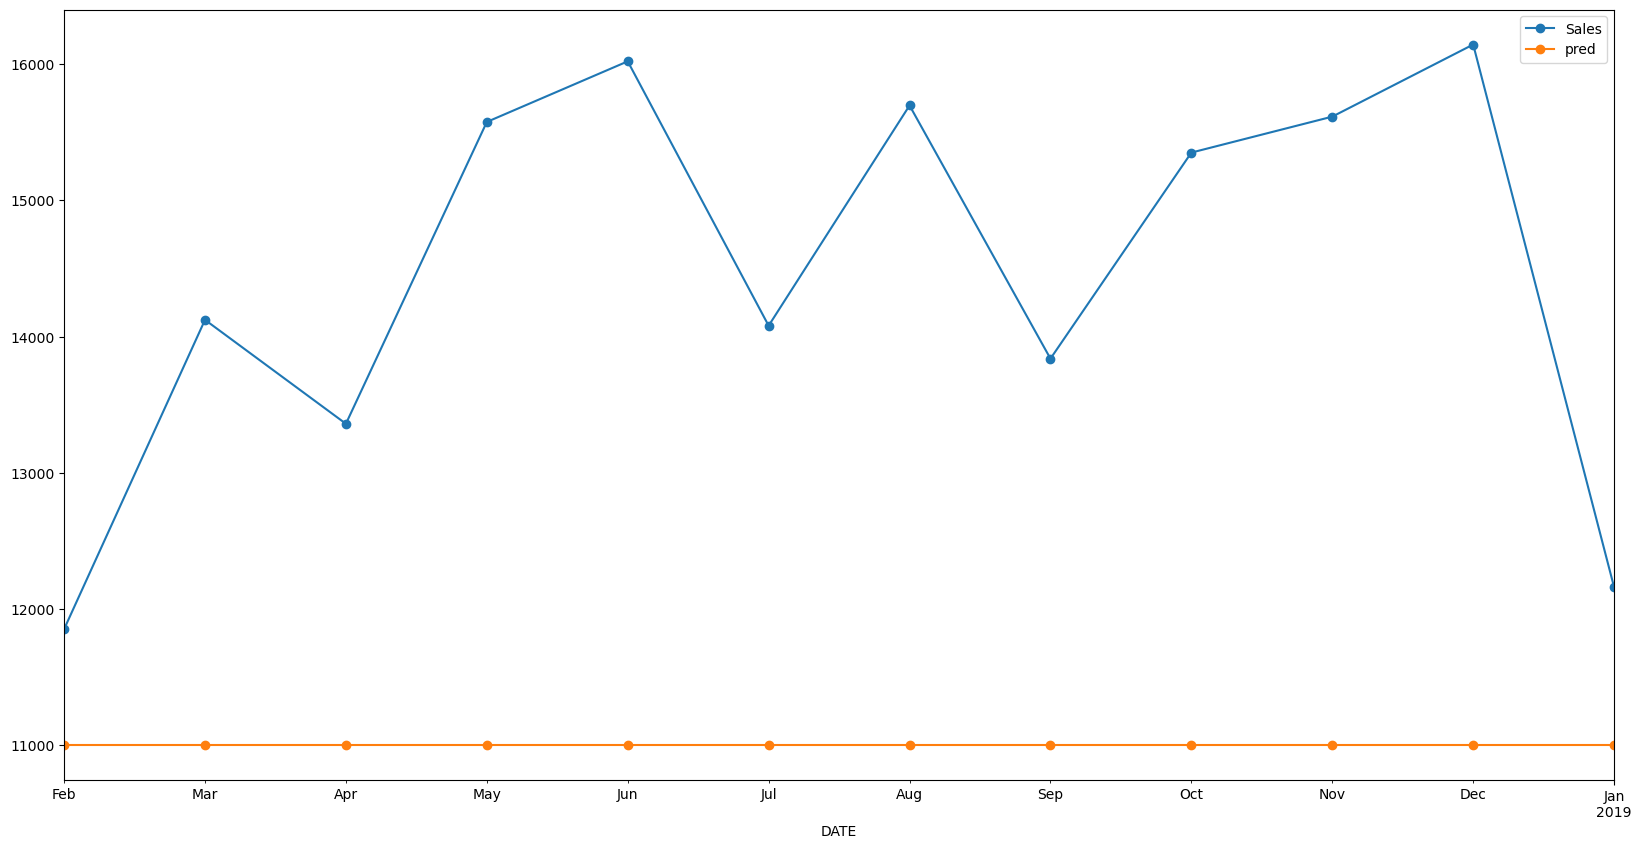

In [110]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

MAE : 3832.336
RMSE : 4086.14
MAPE: 25.699


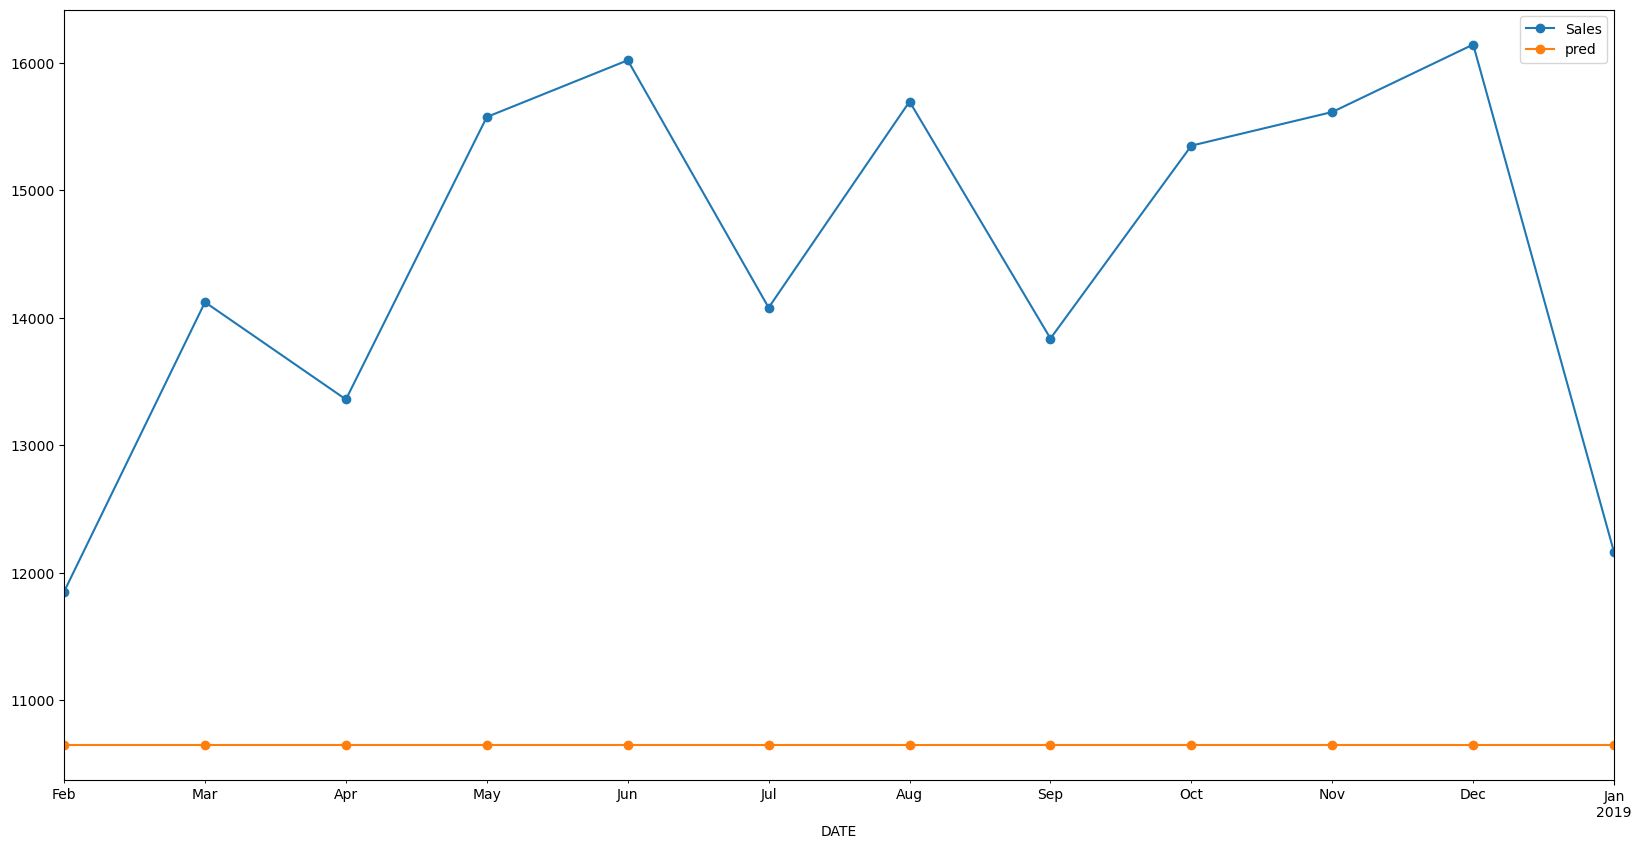

In [111]:
# Global mean or entire train data mean 
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [112]:
test_x.index

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

MAE : 839.08
RMSE : 1075.542
MAPE: 5.765


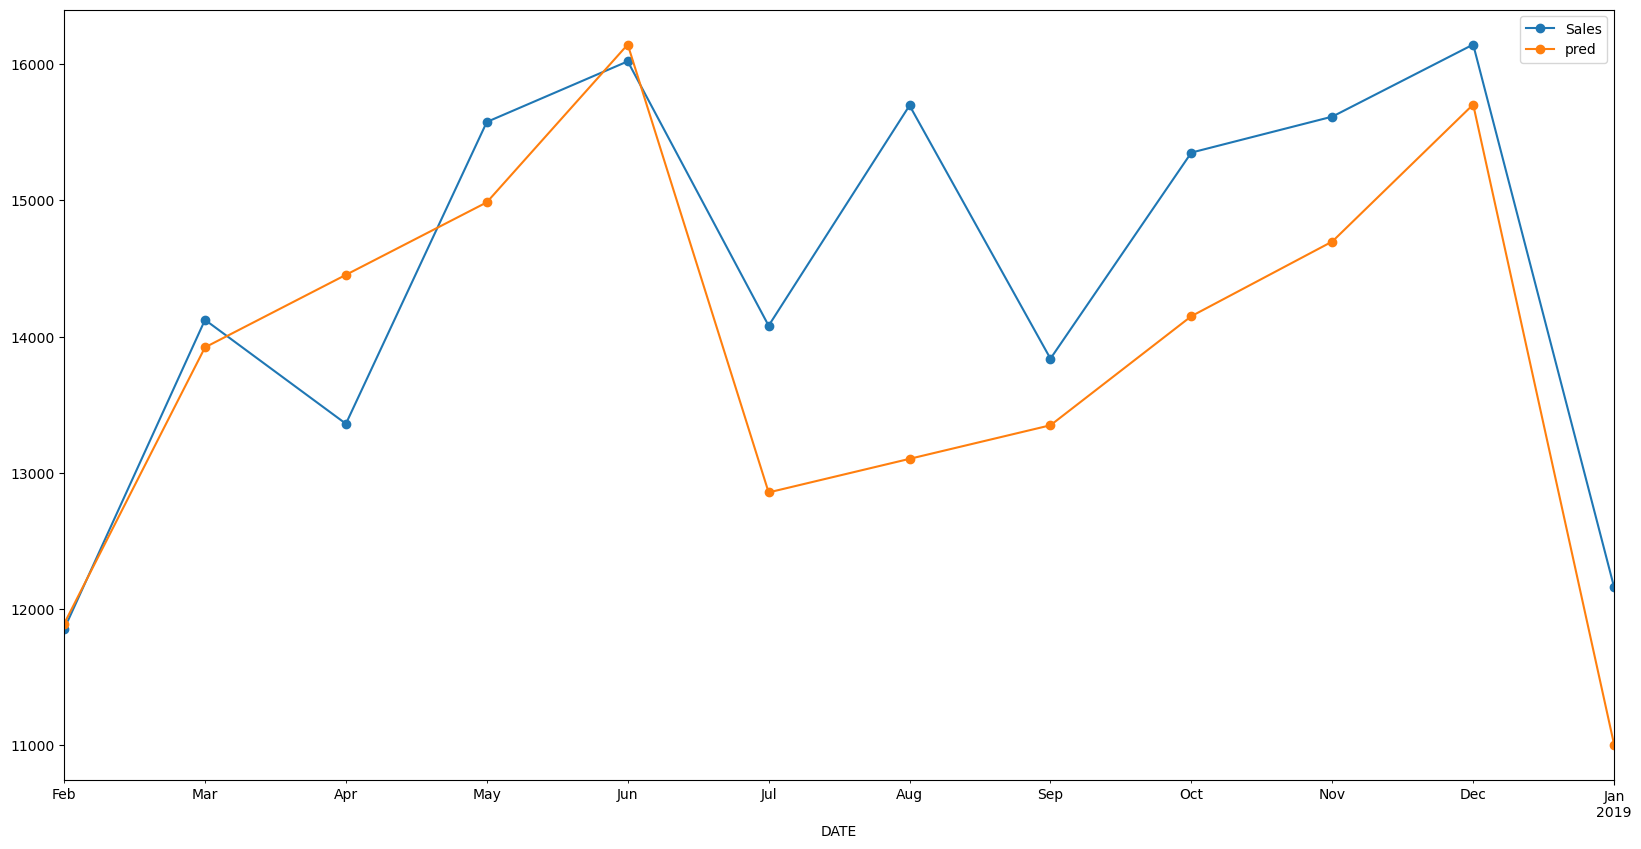

In [113]:
# Seasonal naive method 

for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

MAE : 3360.892
RMSE : 3640.673
MAPE: 22.424


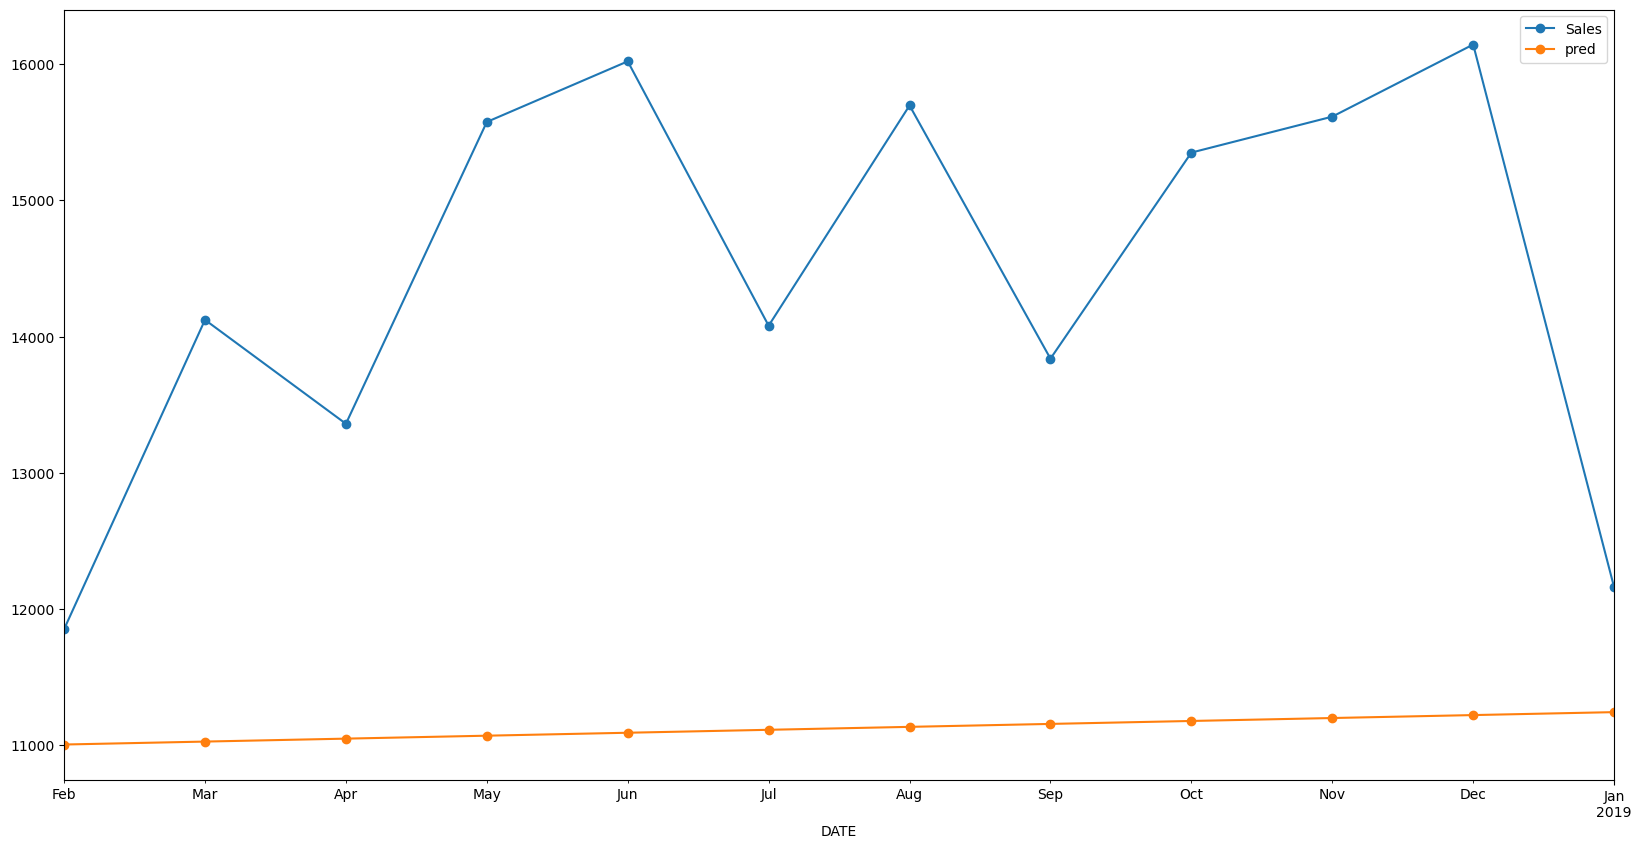

In [114]:
## Drift method 

y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Simple exponetial smoothing 

In [115]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales)
_ = model.fit(smoothing_level = 0.6)
_.fittedvalues

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6573.360000
2001-02-01     6573.360000
2001-03-01     6621.744000
2001-04-01     7047.897600
2001-05-01     7218.359040
                  ...     
2018-09-01    15275.399887
2018-10-01    14412.959955
2018-11-01    14975.783982
2018-12-01    15359.313593
2019-01-01    15830.413437
Length: 217, dtype: float64

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


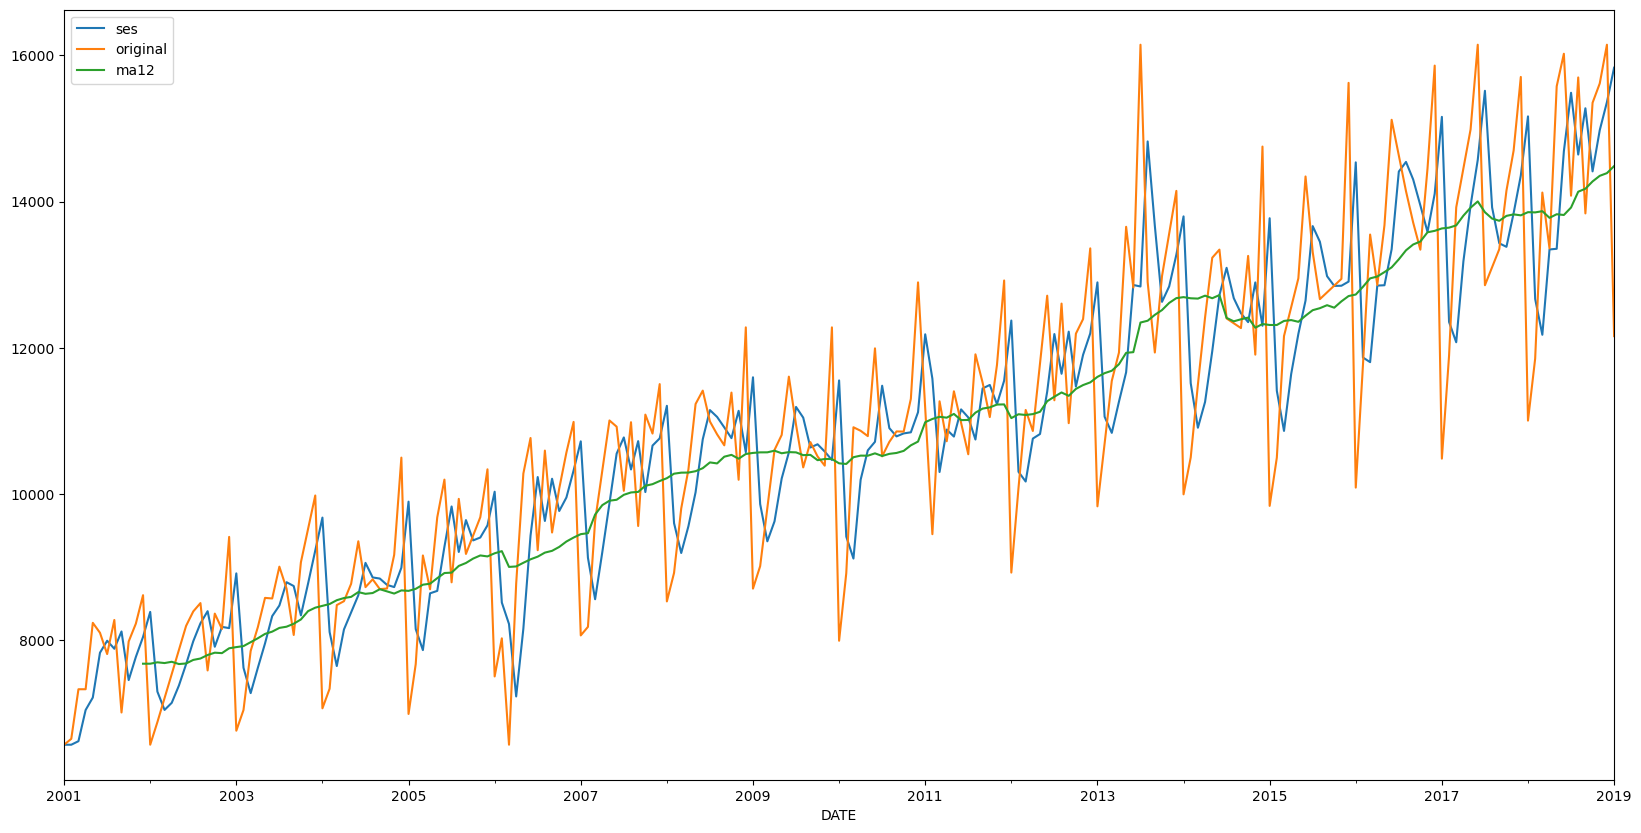

In [116]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6).fittedvalues)

pred.plot(label='ses')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='ma12')
plt.legend()

In [117]:
## mape on entire training data 
mape(mobile_sales.Sales, pred)*100

9.35218552957409

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


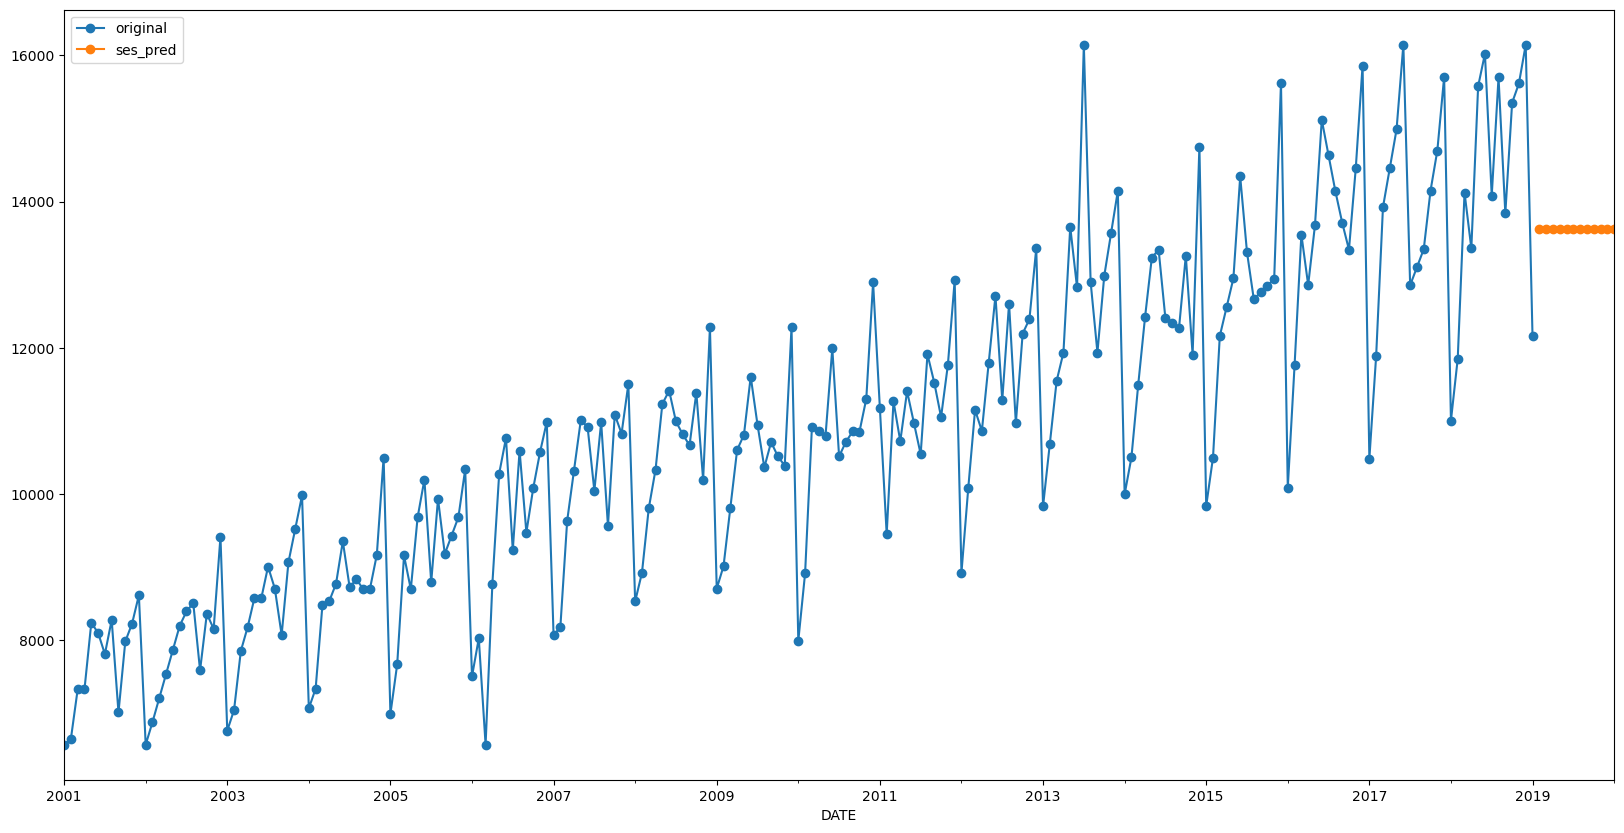

In [118]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6)
pred = model.forecast(12)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

In [119]:
pred

2019-02-01    13628.165375
2019-03-01    13628.165375
2019-04-01    13628.165375
2019-05-01    13628.165375
2019-06-01    13628.165375
2019-07-01    13628.165375
2019-08-01    13628.165375
2019-09-01    13628.165375
2019-10-01    13628.165375
2019-11-01    13628.165375
2019-12-01    13628.165375
2020-01-01    13628.165375
Freq: MS, dtype: float64

In [120]:
test_x

Sales          pred
DATE                              
2018-02-01  11852.00  11005.000000
2018-03-01  14123.00  11026.617756
2018-04-01  13360.00  11048.235512
2018-05-01  15576.00  11069.853268
2018-06-01  16021.00  11091.471024
2018-07-01  14080.00  11113.088780
2018-08-01  15697.00  11134.706537
2018-09-01  13838.00  11156.324293
2018-10-01  15351.00  11177.942049
2018-11-01  15615.00  11199.559805
2018-12-01  16144.48  11221.177561
2019-01-01  12160.00  11242.795317

In [121]:
mape(test_x.Sales,pred )*100

9.78751384570306

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


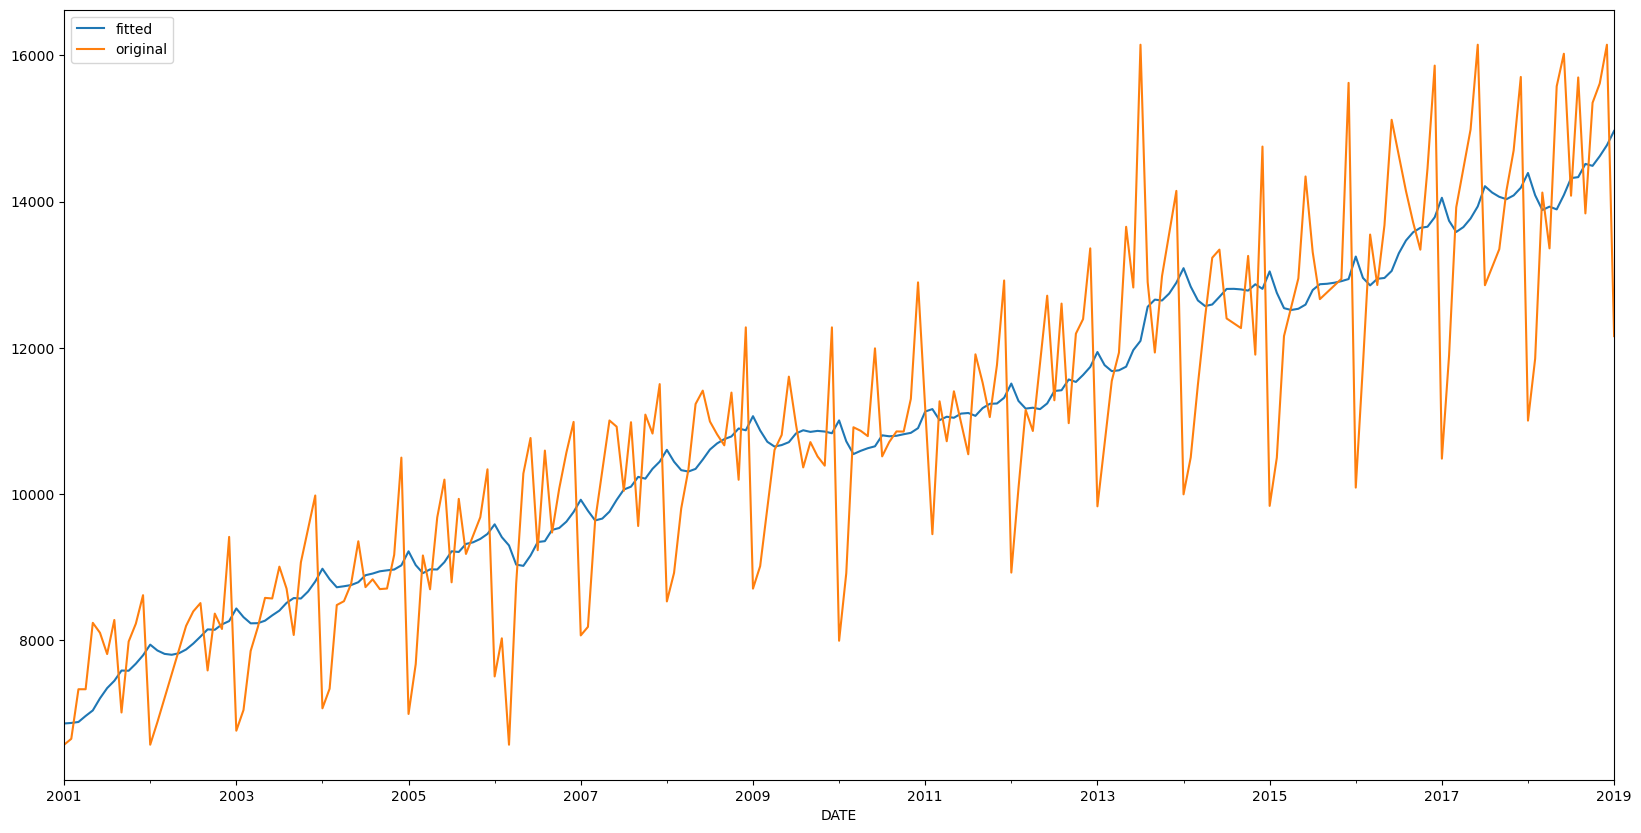

In [122]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

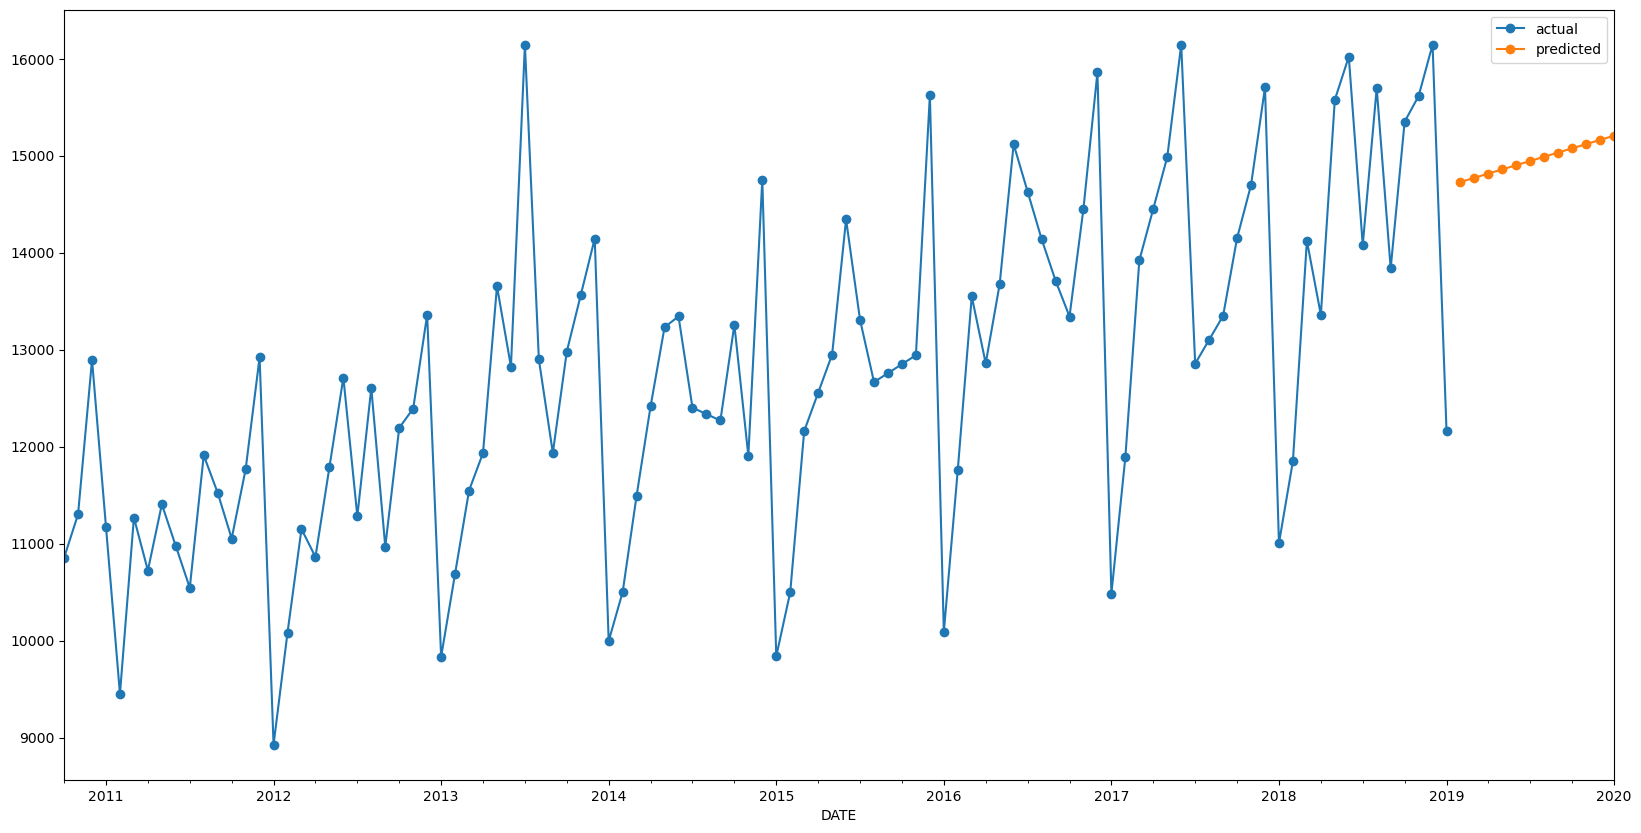

In [123]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


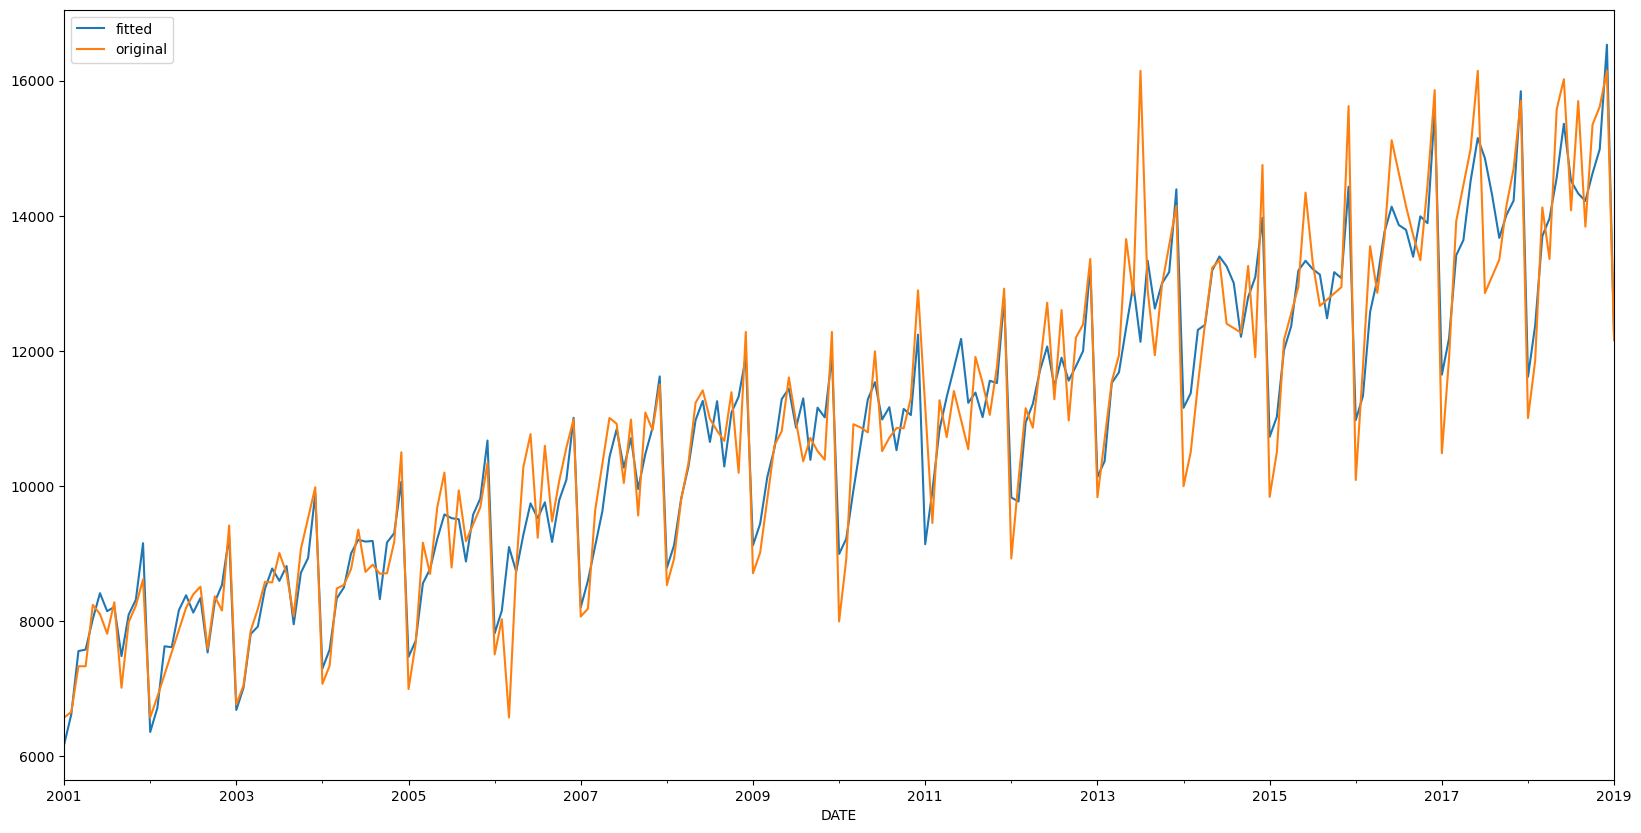

In [124]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

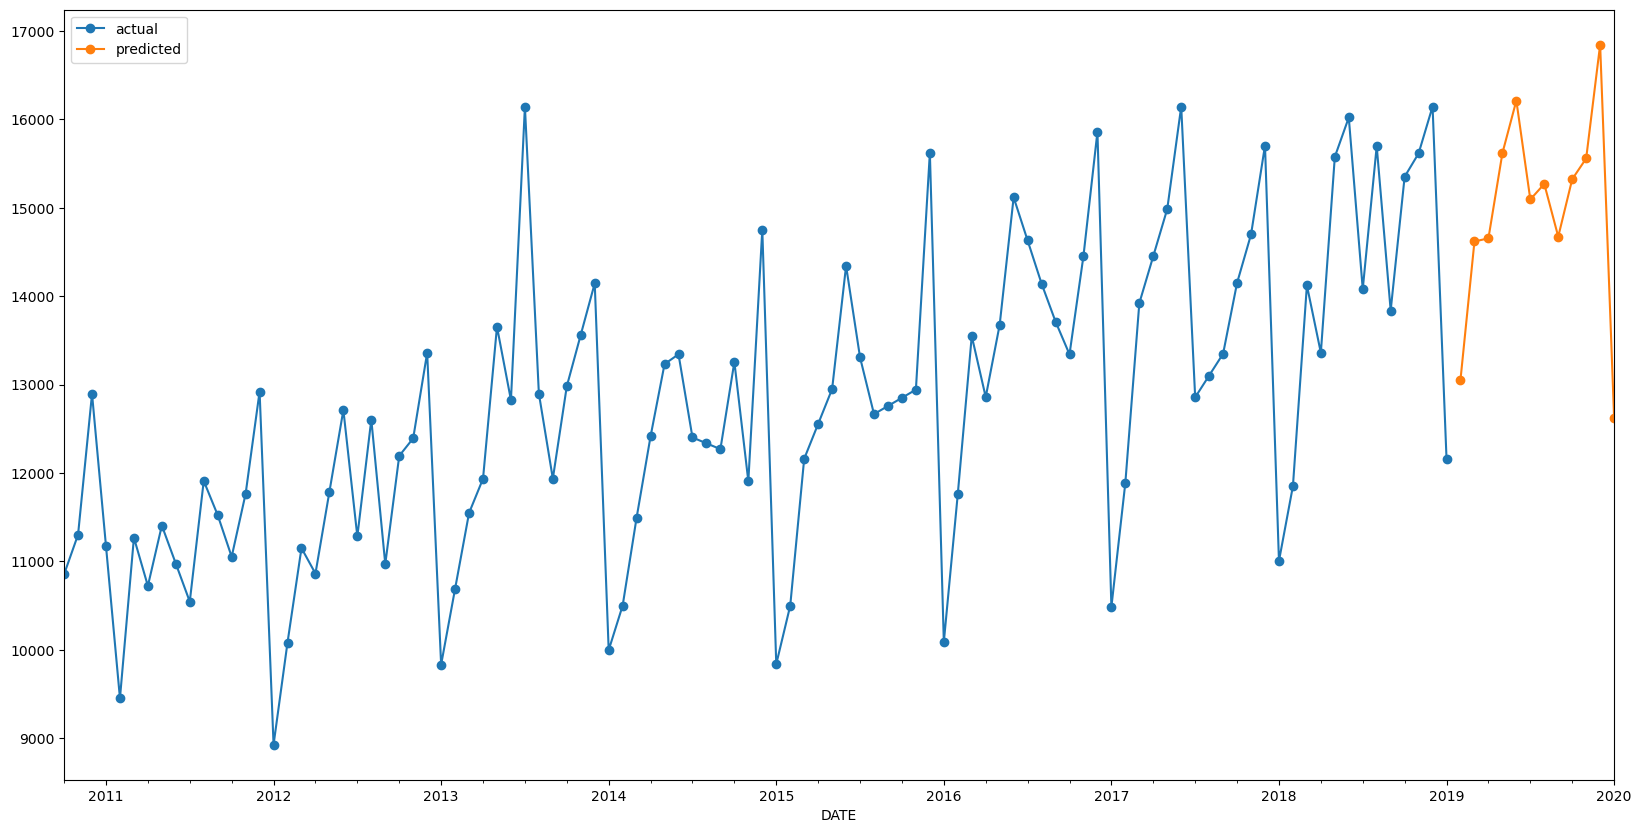

In [125]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


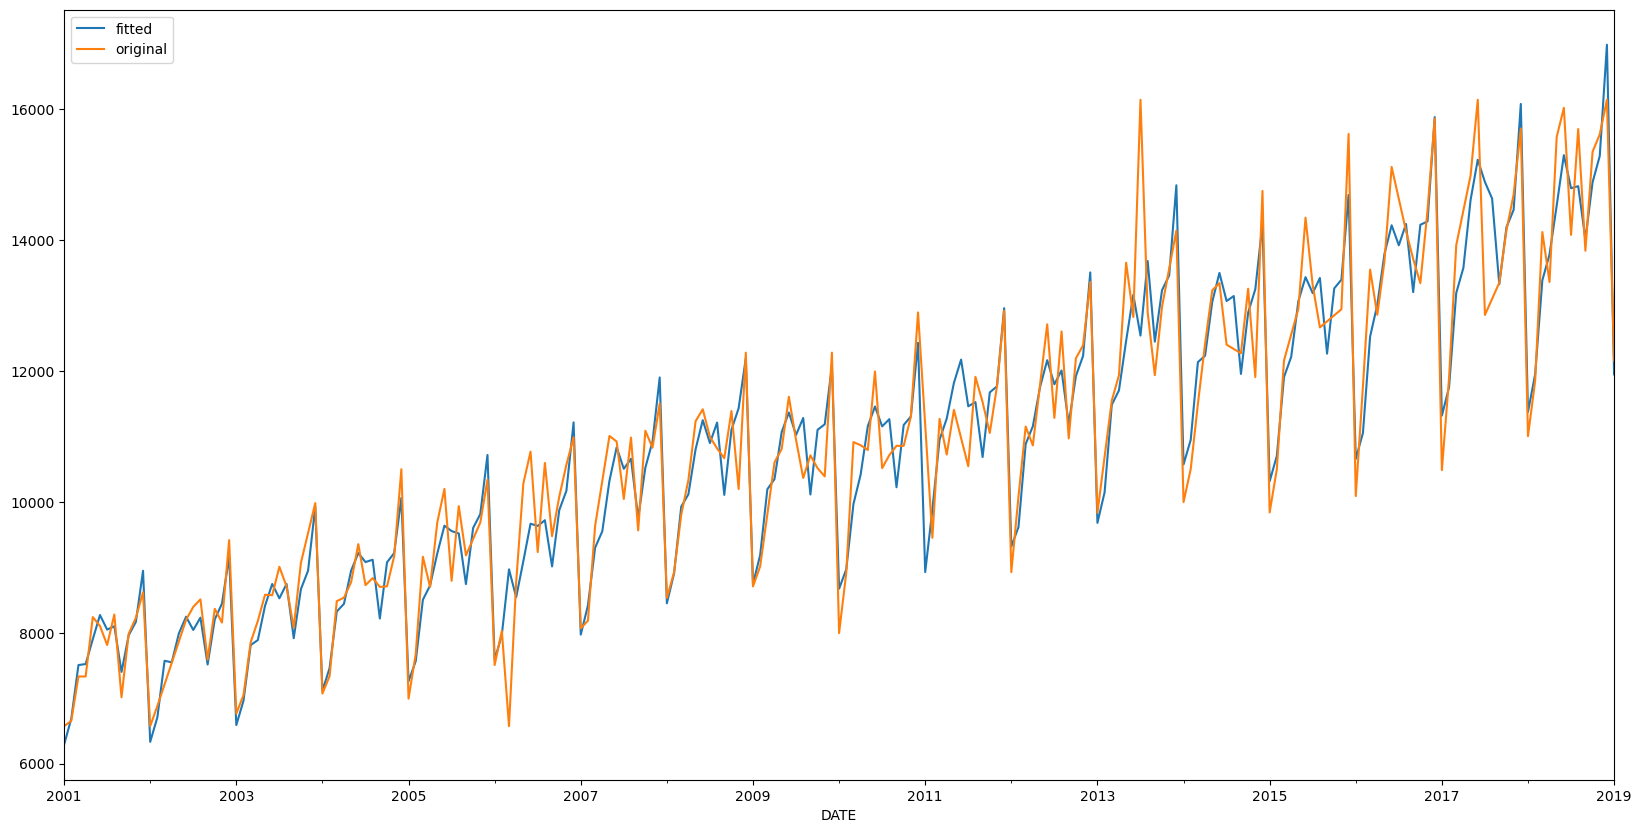

In [126]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='mul', seasonal='mul').fit(smoothing_level=0.2)
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

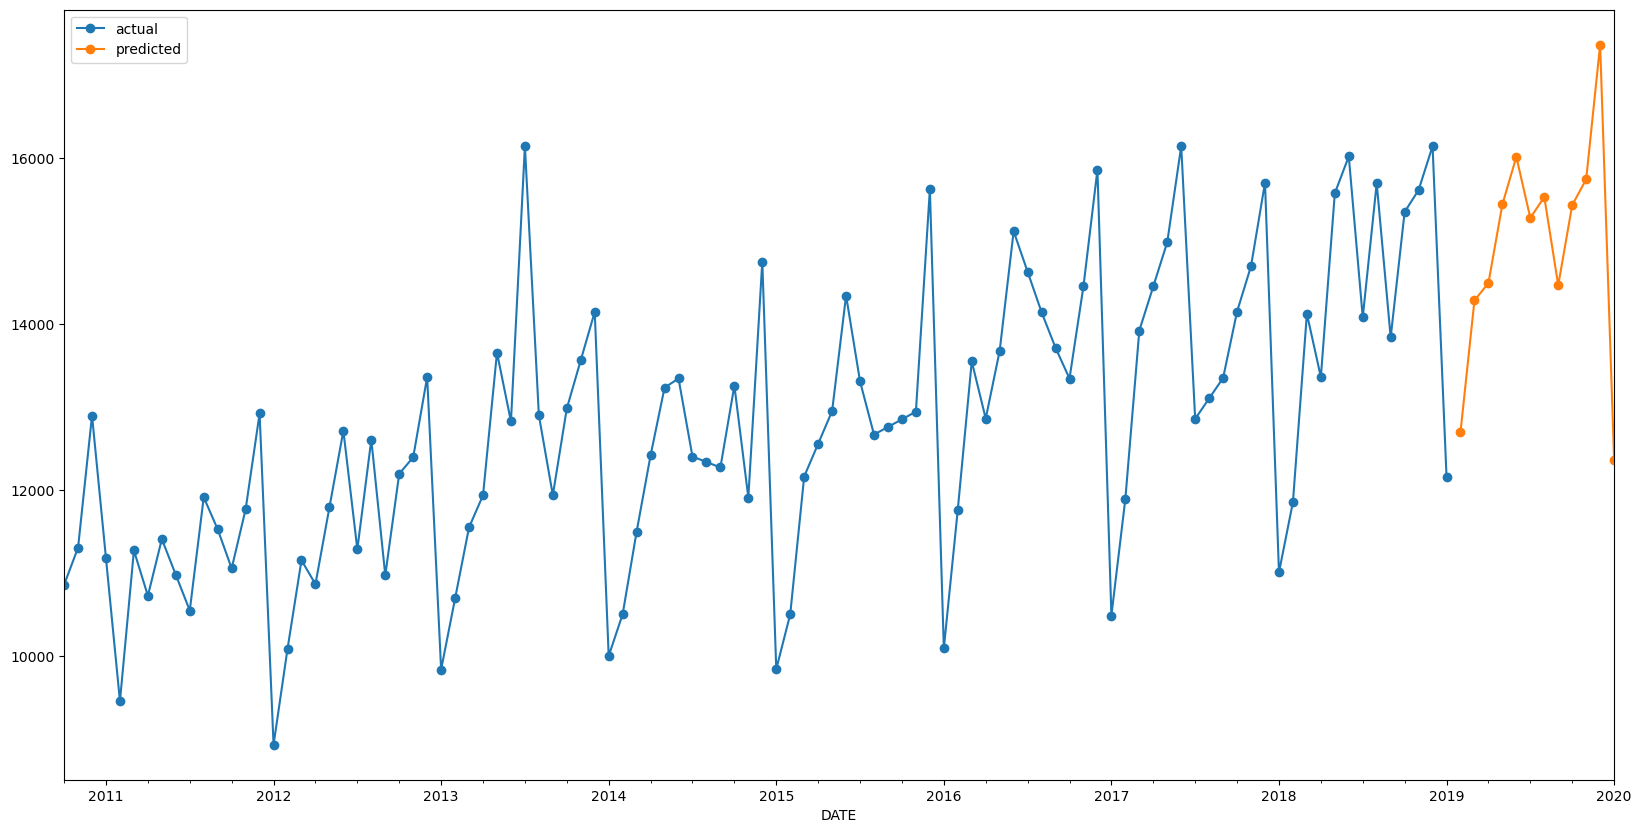

In [127]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

<Axes: xlabel='DATE'>

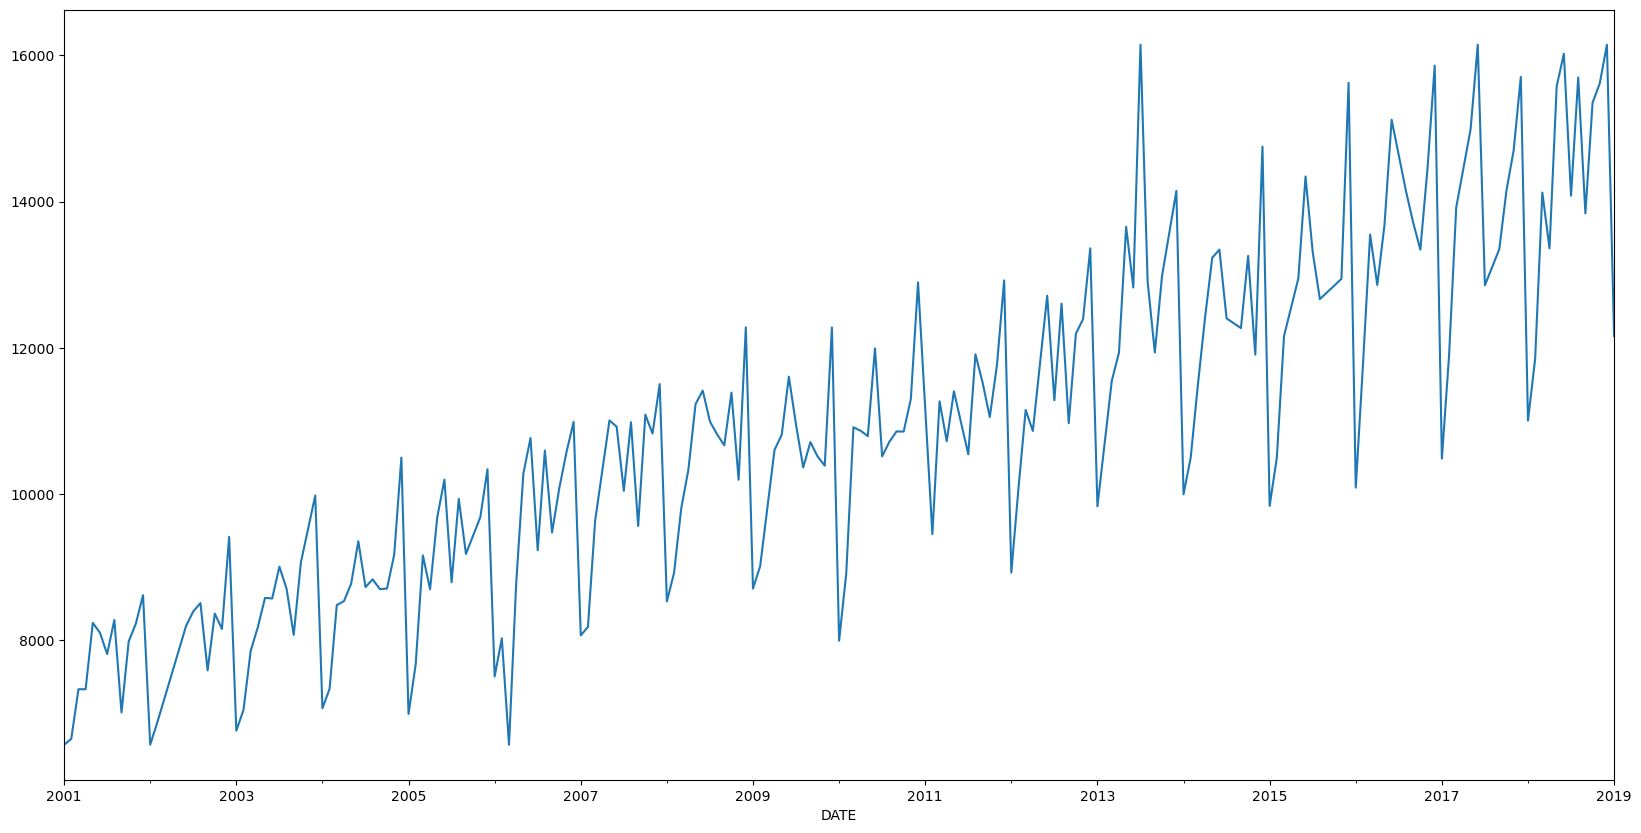

In [128]:
mobile_sales.Sales.plot()

In [129]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9786335779042278

In [130]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

Sequence is not stationary


In [131]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

<Axes: xlabel='DATE'>

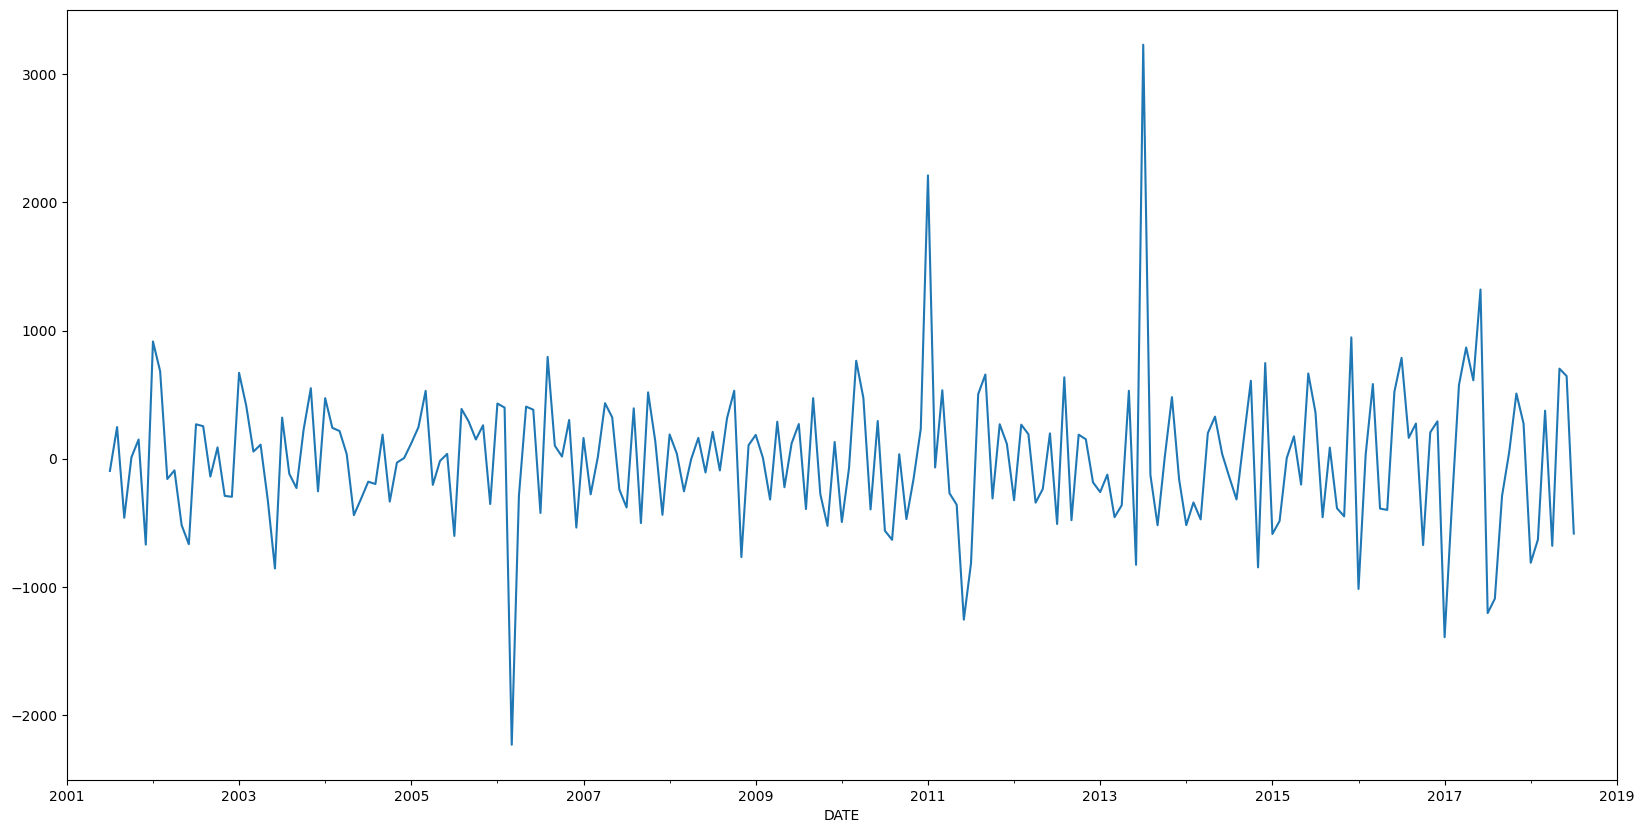

In [132]:
model.resid.plot()

In [133]:
adf_test(model.resid.dropna())

Sequence is stationary


In [134]:
sm.tsa.stattools.adfuller(model.resid.dropna())[1]

3.7134101382157896e-08

# ML: Time Series Analysis - 3

### ACF/PACF

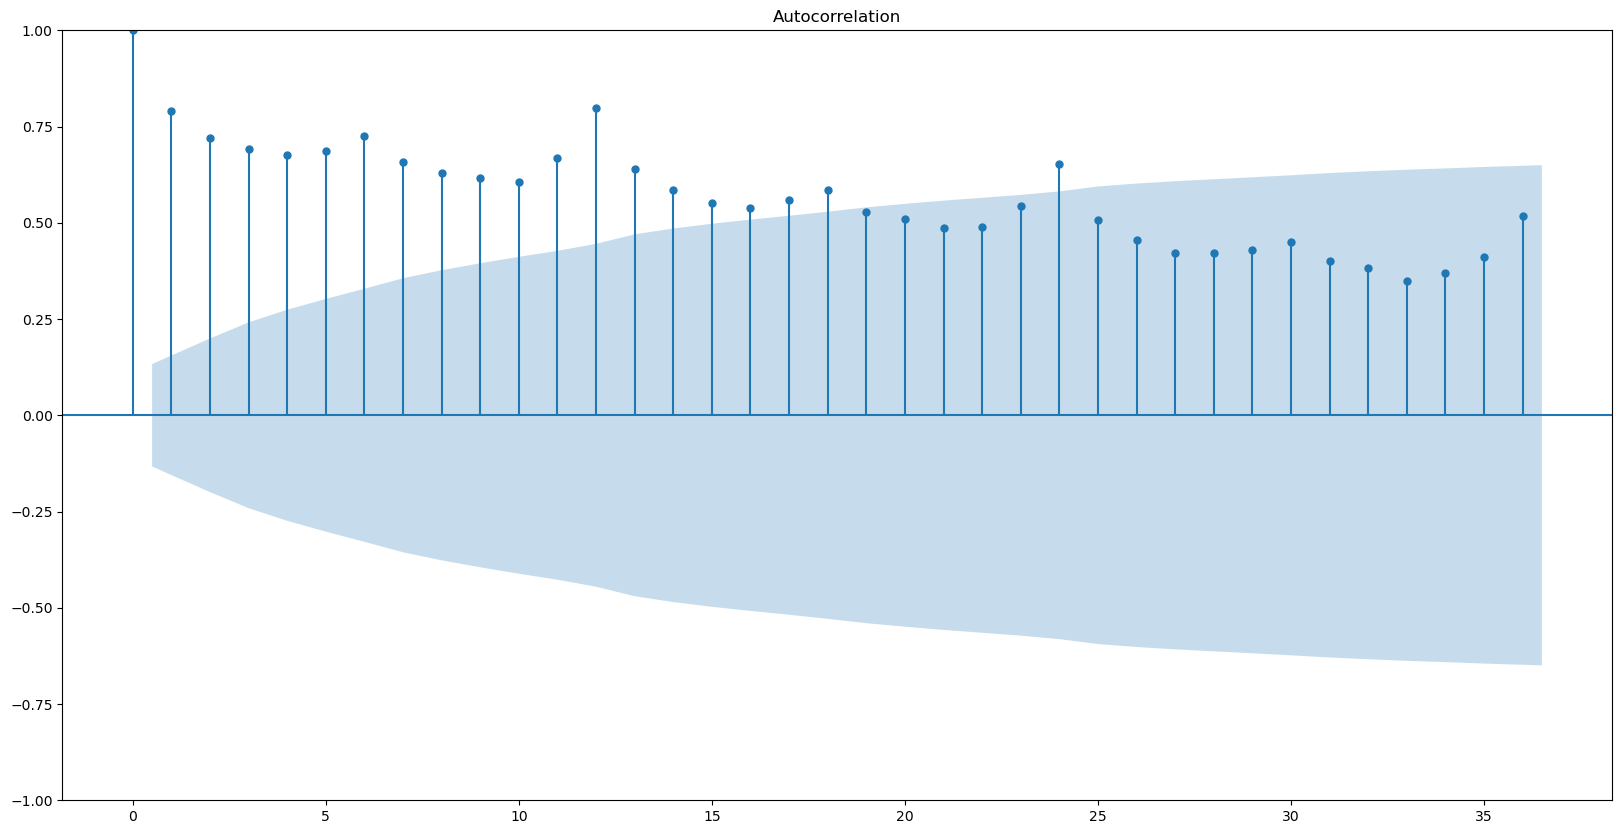

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(mobile_sales.Sales, lags=36);

- lag 0 is 1 since it's the same time series. Hence, strong corr.
- lag 6 has stronger correlation compared to the past 5 months.
- lag 12, lag 24, lag 36 are high comparatively. That tells us there's strong seasonality in the data.
- The blue region is called confidence limit.

- Confidence limits are slighly lesser somewhere below 0.5
- That means in the recent lags, if the correlation is higher than the confidence limit, it means those correlations are significant. They are telling you something.

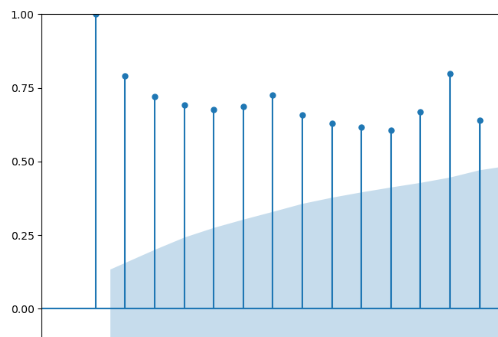

- As we go into the distant past, these correlations are strong but they are insignificant cuz they are way back in the past. They might be taccidentally correlating also.

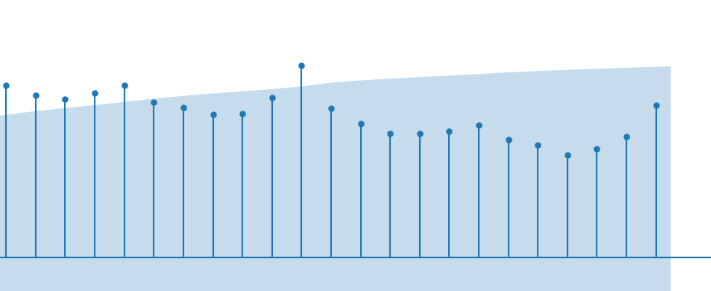

- Another reason why we're seeing a graph like that is cuz the time series is non stationary.
- We should check this on stationary time series. Then only we'll see a proper graph. 
- But, just for the sake, we're checking it on non stationary time series.
- That's the reason why we see all of them having +ve correlation.
- Stationary time series would have +ve and -ve auto-correlations.
- This also tells us that there's a strong trend. If there was no trend, some of the lags would have +ve auto corr and some -ve auto correlation.

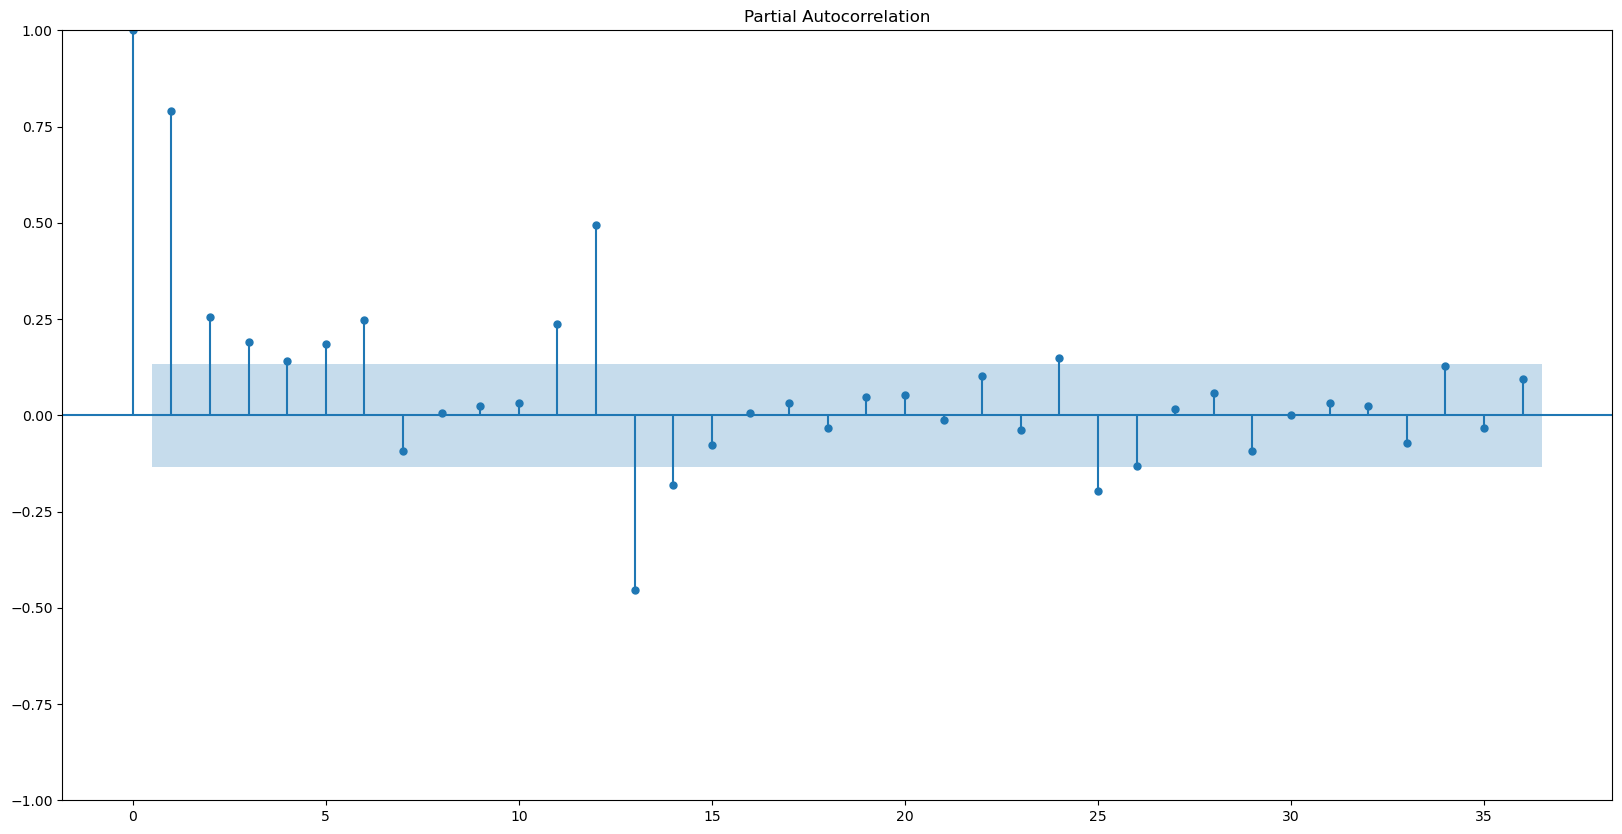

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_pacf(mobile_sales.Sales, lags=36);

- After removing the effects of immediate ones, it shows the partial auto correlation.
- lag 1 has strong corr, others have a little bit and lag 12 still is having strong correlation.

In [137]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]  # it's not stationary

0.9786335779042278

<Axes: xlabel='DATE'>

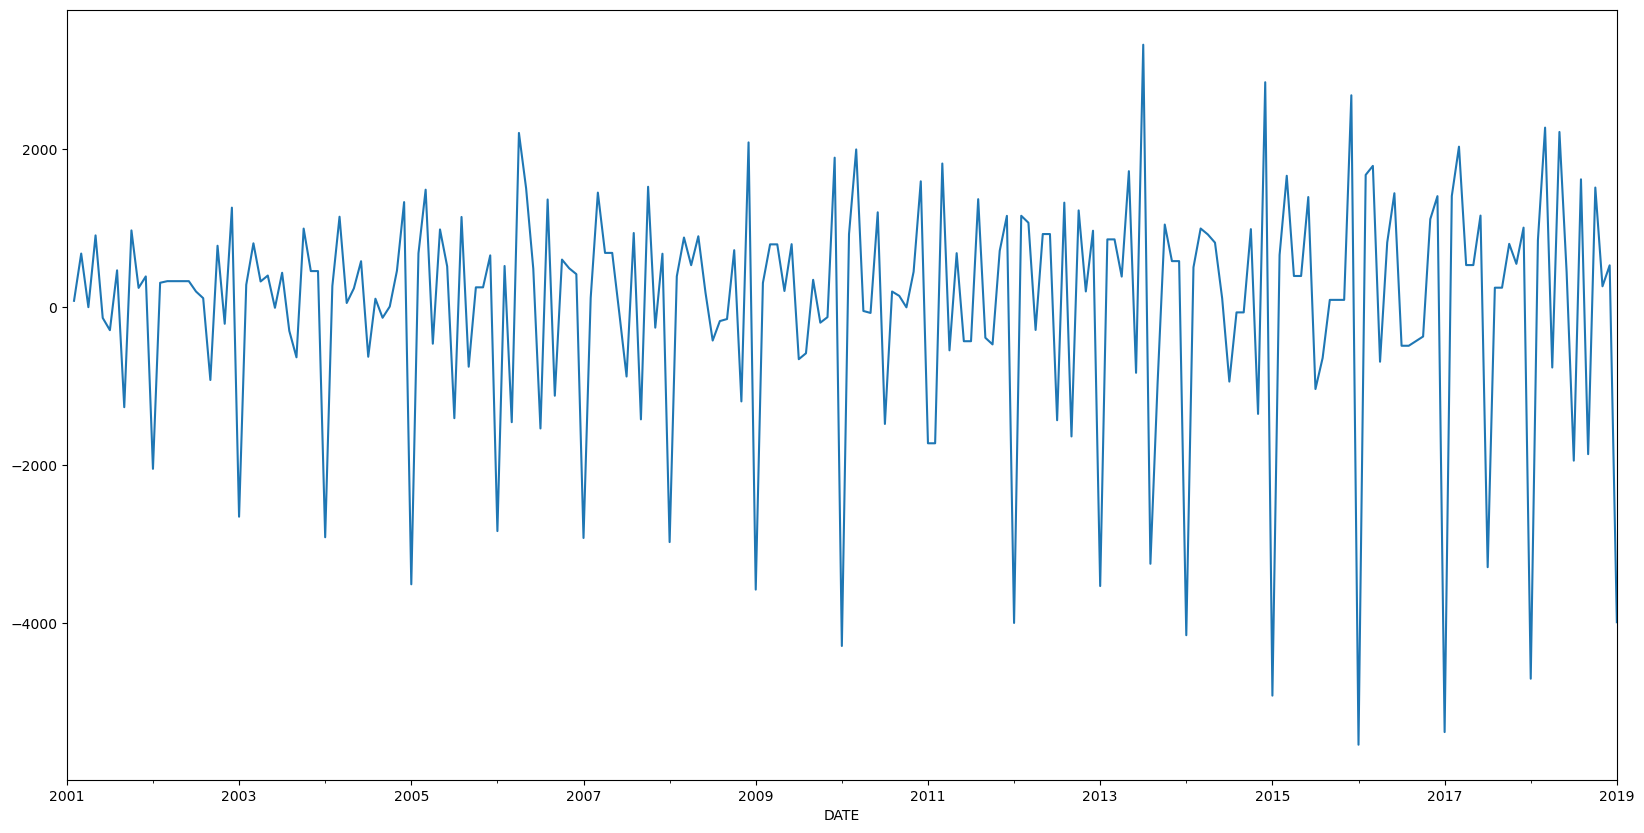

In [138]:
mobile_sales.Sales.diff(1).plot()    # differentiated time series (first order time series)

In [139]:
# dropna cuz first one will be nan
sm.tsa.stattools.adfuller(mobile_sales.Sales.diff(1).dropna())[1]    # first order time series is stationary

1.0038630872315659e-16

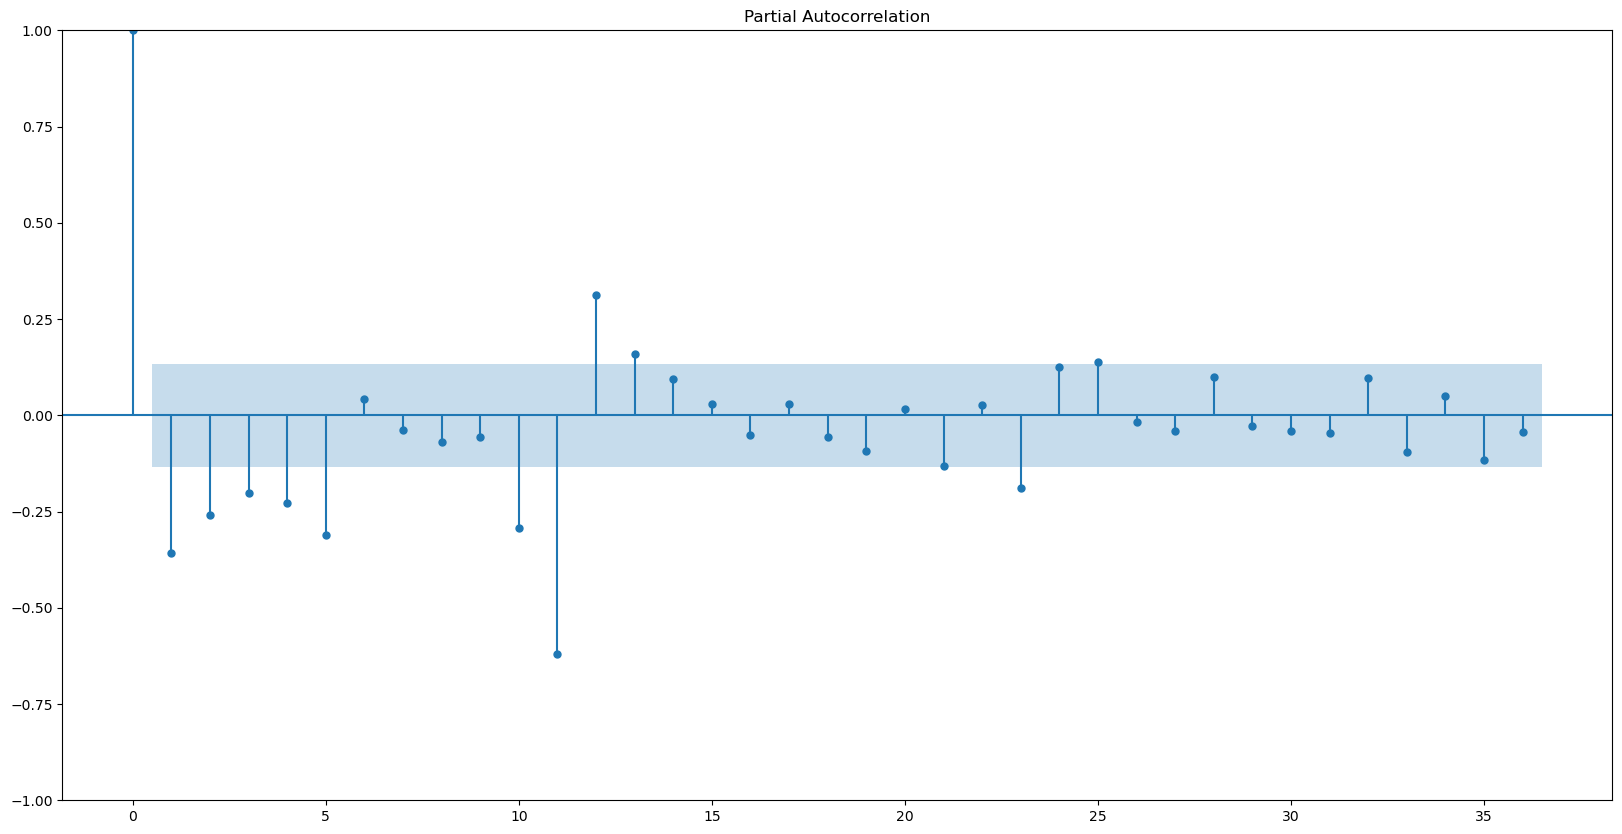

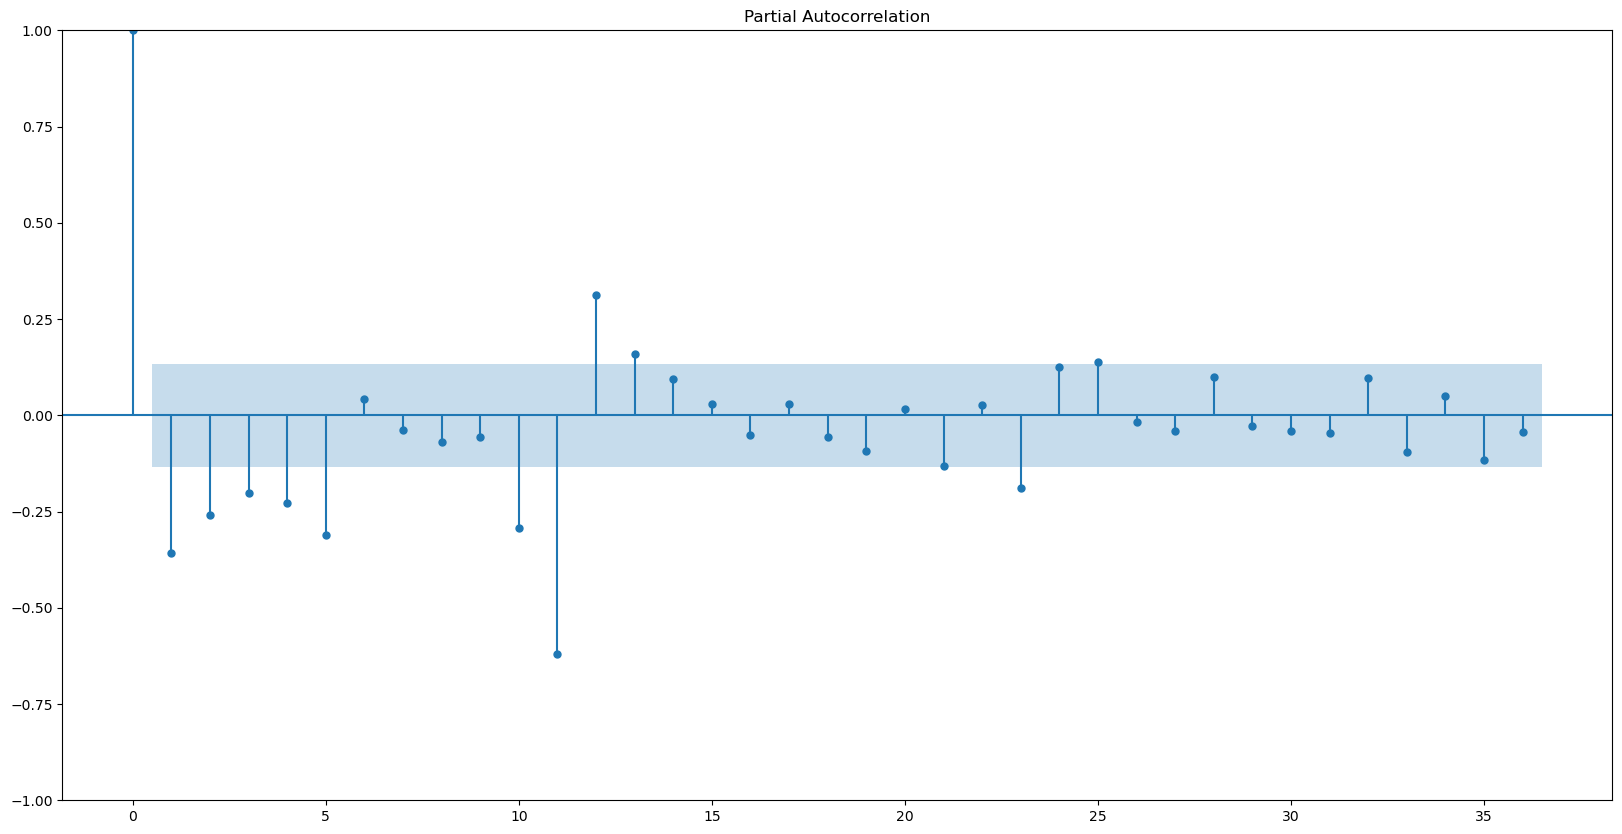

In [140]:
plot_pacf(mobile_sales.Sales.diff(1).dropna(), lags=36)

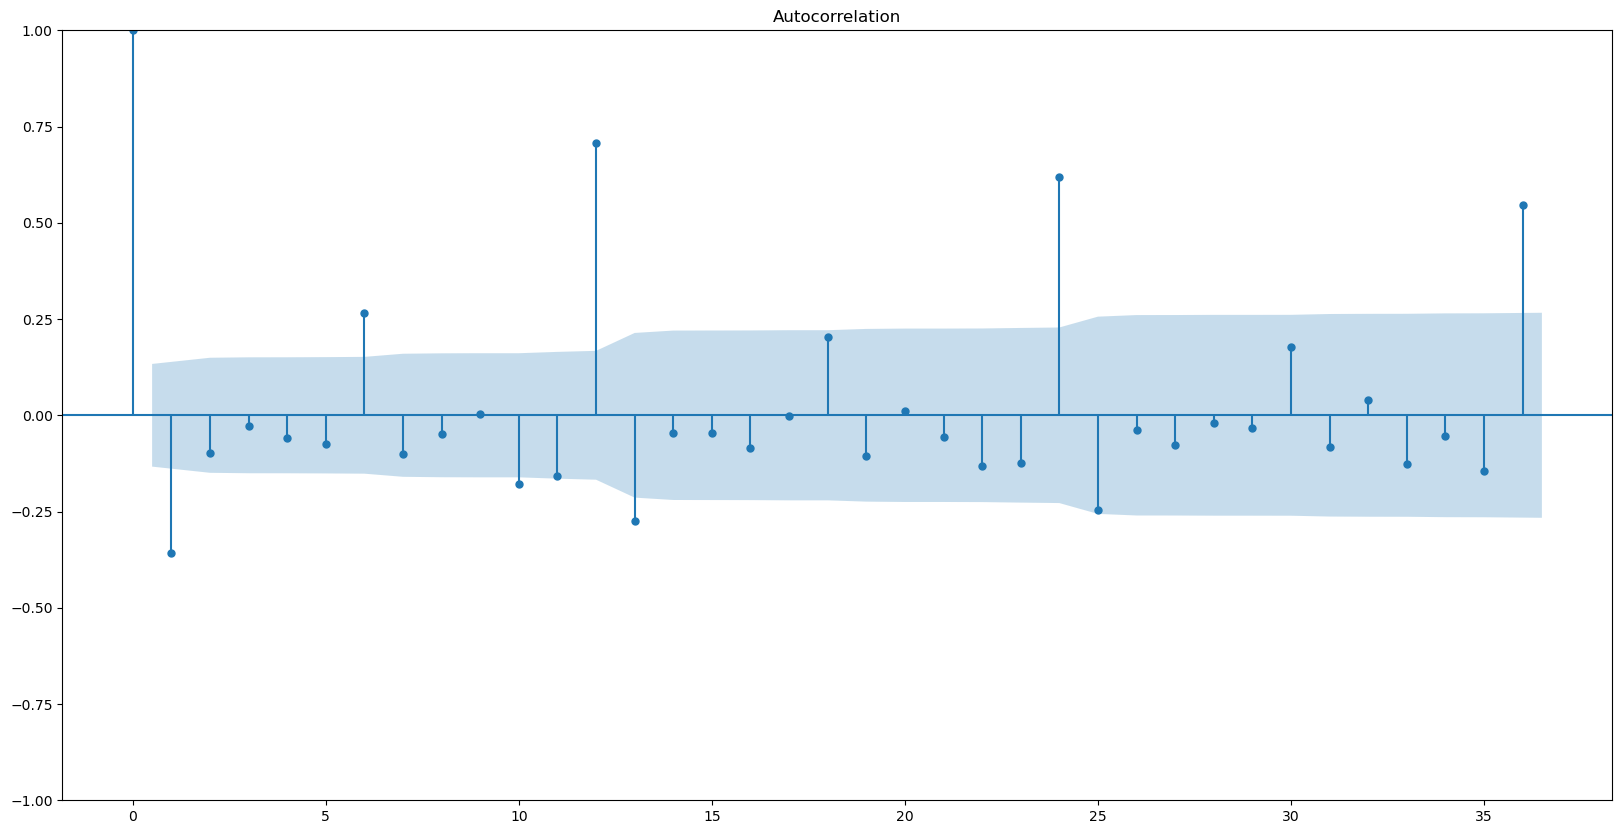

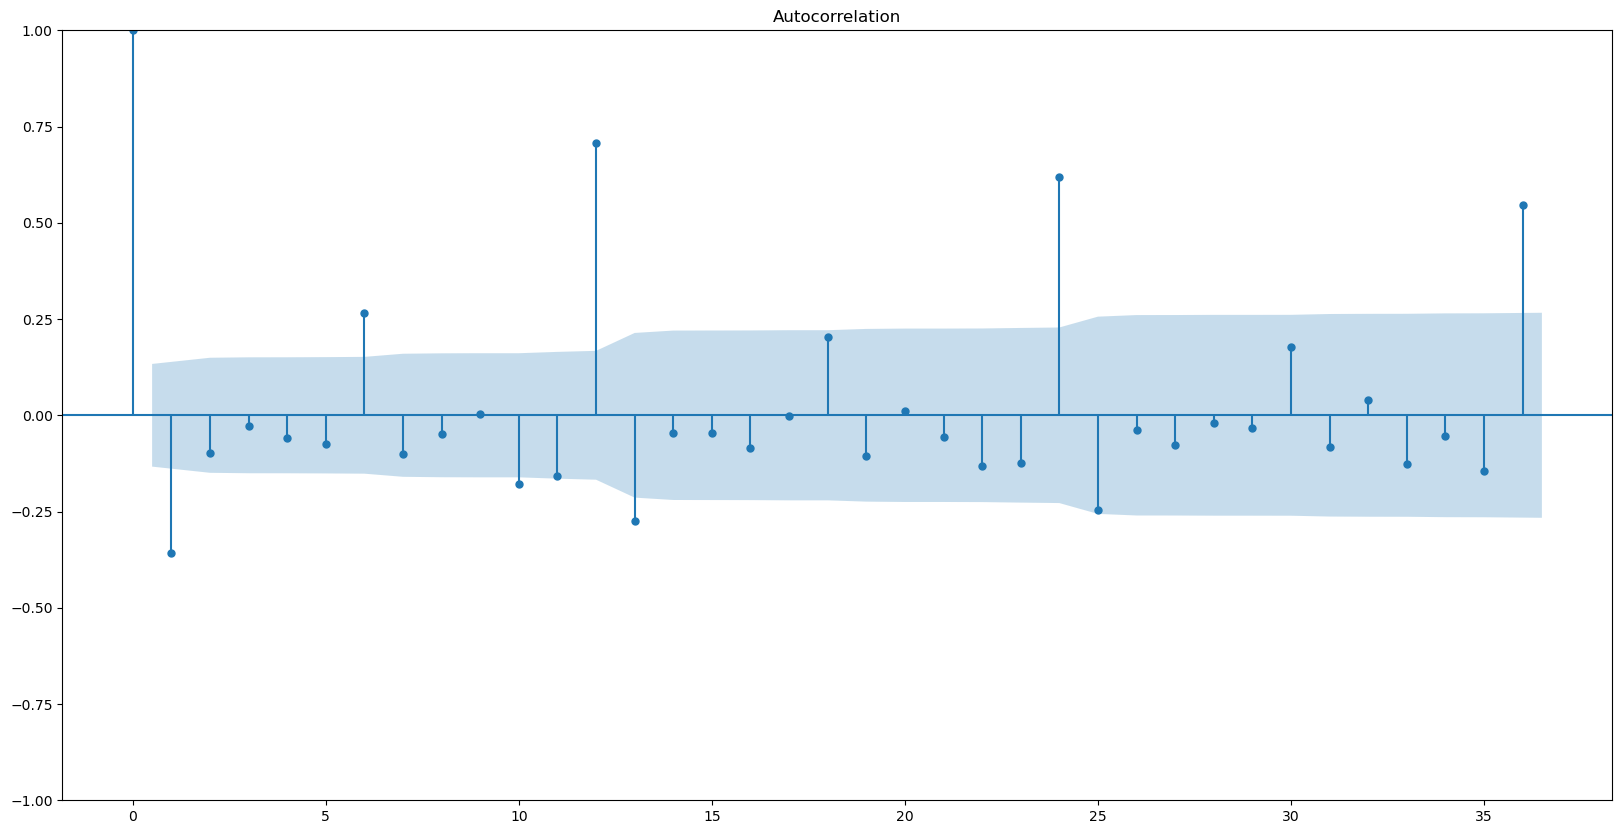

In [141]:
plot_acf(mobile_sales.Sales.diff(1).dropna(), lags=36)

- Even after differencing the time series, there's still seasonality.
- Longer trend is gone.
- Every 6th one is +ve(strong corr) and every 2nd one is -ve.

Below ones are beyond the significance level.

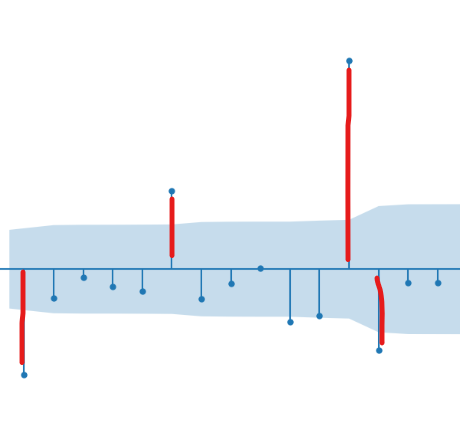

### AR, MA, ARMA, ARIMA  

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  # we use SARIMAX for all the different methods involving AR and MA.

In [143]:
# These techniques only work on Stationary time series.
train_x_st = train_x.copy()
train_x_st.Sales = train_x_st.Sales.diff(1)  #making the time series stationary
train_x_st.dropna(inplace=True)    # dropping na observations cuz anyhow it'll be a past observation. Won't make much difference
adf_test(train_x_st.Sales)

Sequence is stationary


C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 14293.967
RMSE : 14396.211
MAPE: 98.523


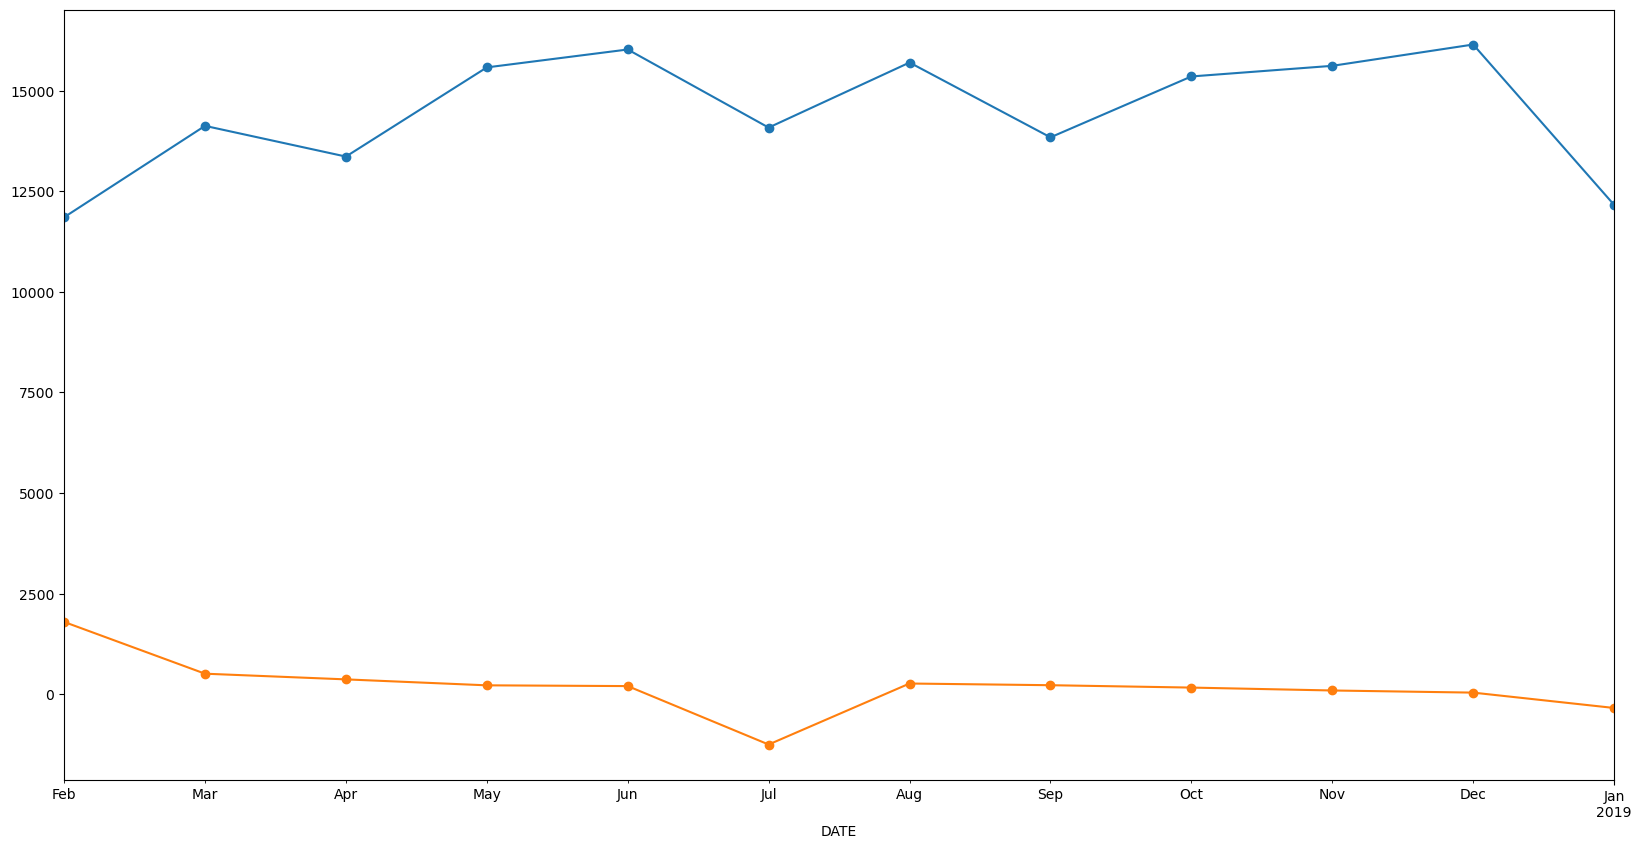

In [144]:
# p = 5 for AR. How many past obs we're gonna use to perform AR.
# q = how many past obs errors we're going to use for this.
# p,q is for ARMA
# But here, the SARIMAX class is always gonna have ARIMA
# d = here the differentiation of time series to make it stationary will automatically happen if we give d.
# d = 1 means 1st order differentiation
# But, we already made the time series stationary above.

model = SARIMAX(train_x_st.Sales, order=(5, 0, 0))   # Auto regressive
model = model.fit(disp=False)

## Predictions
test_x['pred'] = model.forecast(steps=12) # We forcasted delta y 

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

- MAPE is too high cuz we're plotting stationary(differentiated) time series predictions against the non stationary time series.

In [145]:
test_x['pred']

DATE
2018-02-01    1796.116671
2018-03-01     509.799038
2018-04-01     368.423833
2018-05-01     220.551619
2018-06-01     201.675589
2018-07-01   -1250.345348
2018-08-01     265.584237
2018-09-01     223.522774
2018-10-01     164.540245
2018-11-01      92.495481
2018-12-01      39.517466
2019-01-01    -342.002183
Name: pred, dtype: float64

In [146]:
test_x['pred'].cumsum()

DATE
2018-02-01    1796.116671
2018-03-01    2305.915709
2018-04-01    2674.339542
2018-05-01    2894.891161
2018-06-01    3096.566749
2018-07-01    1846.221401
2018-08-01    2111.805638
2018-09-01    2335.328412
2018-10-01    2499.868657
2018-11-01    2592.364138
2018-12-01    2631.881604
2019-01-01    2289.879422
Name: pred, dtype: float64

In [147]:
train_x.Sales[-1]

11005.0

In [148]:
test_x['pred'].cumsum() + train_x.Sales[-1]

DATE
2018-02-01    12801.116671
2018-03-01    13310.915709
2018-04-01    13679.339542
2018-05-01    13899.891161
2018-06-01    14101.566749
2018-07-01    12851.221401
2018-08-01    13116.805638
2018-09-01    13340.328412
2018-10-01    13504.868657
2018-11-01    13597.364138
2018-12-01    13636.881604
2019-01-01    13294.879422
Name: pred, dtype: float64

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1457.414
RMSE : 1623.419
MAPE: 9.789


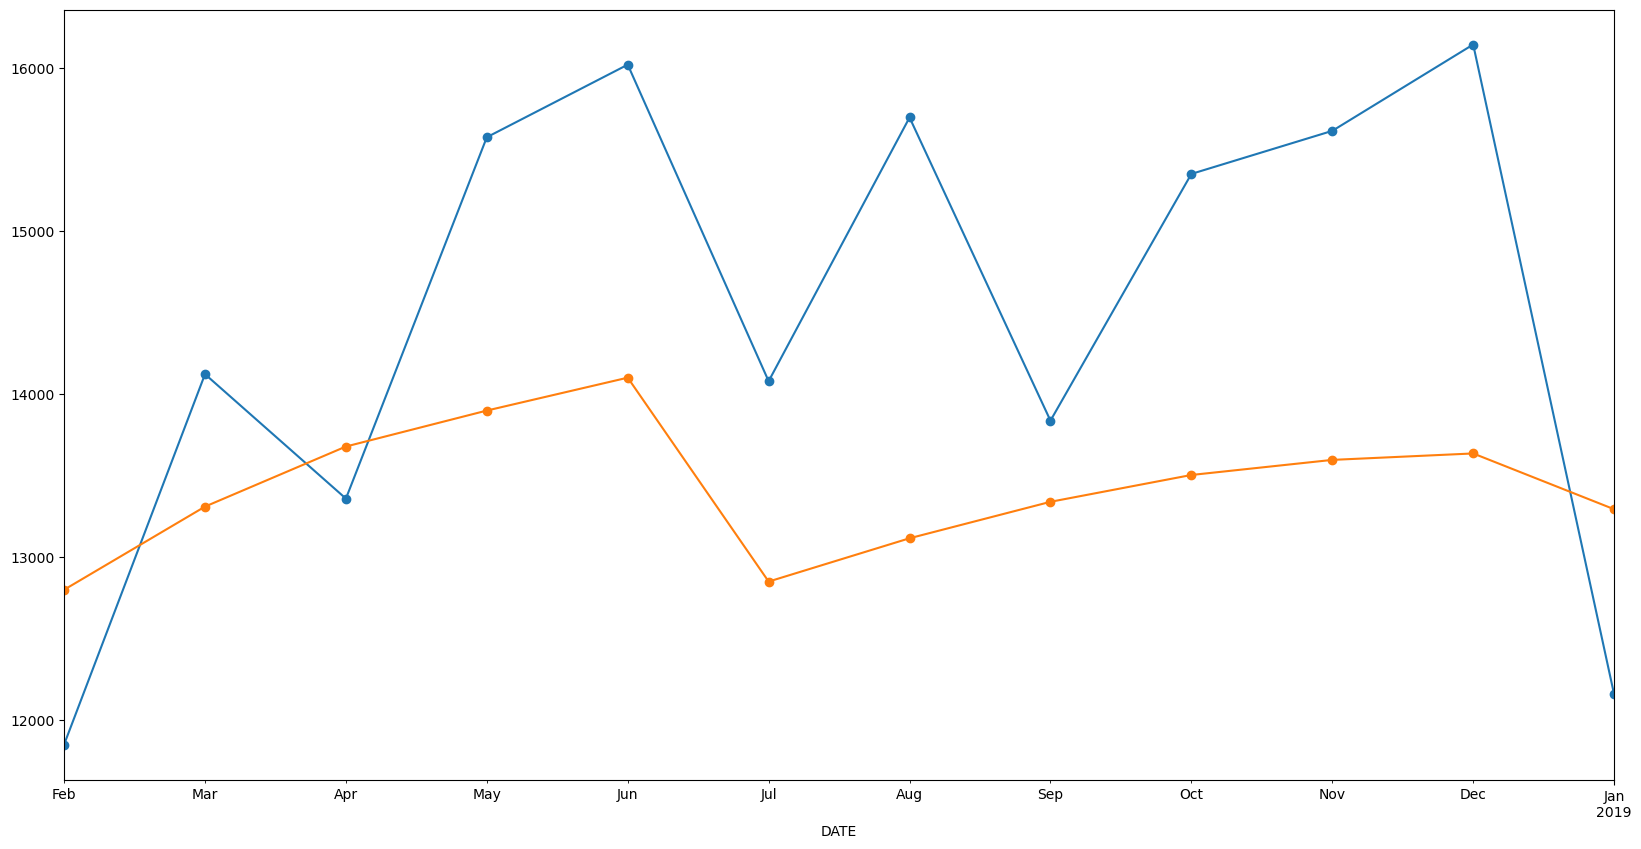

In [149]:
# Integrating back to non-stationary time series

model = SARIMAX(train_x_st.Sales, order=(5, 0, 0))   # Auto regressive
model = model.fit(disp=False)
## Predictions
test_x['pred'] = model.forecast(steps=12) # We forcasted delta y 
# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

- After integrating it back, MAPE drastically came down to 9.789

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE : 1309.704
RMSE : 1505.045
MAPE: 8.932


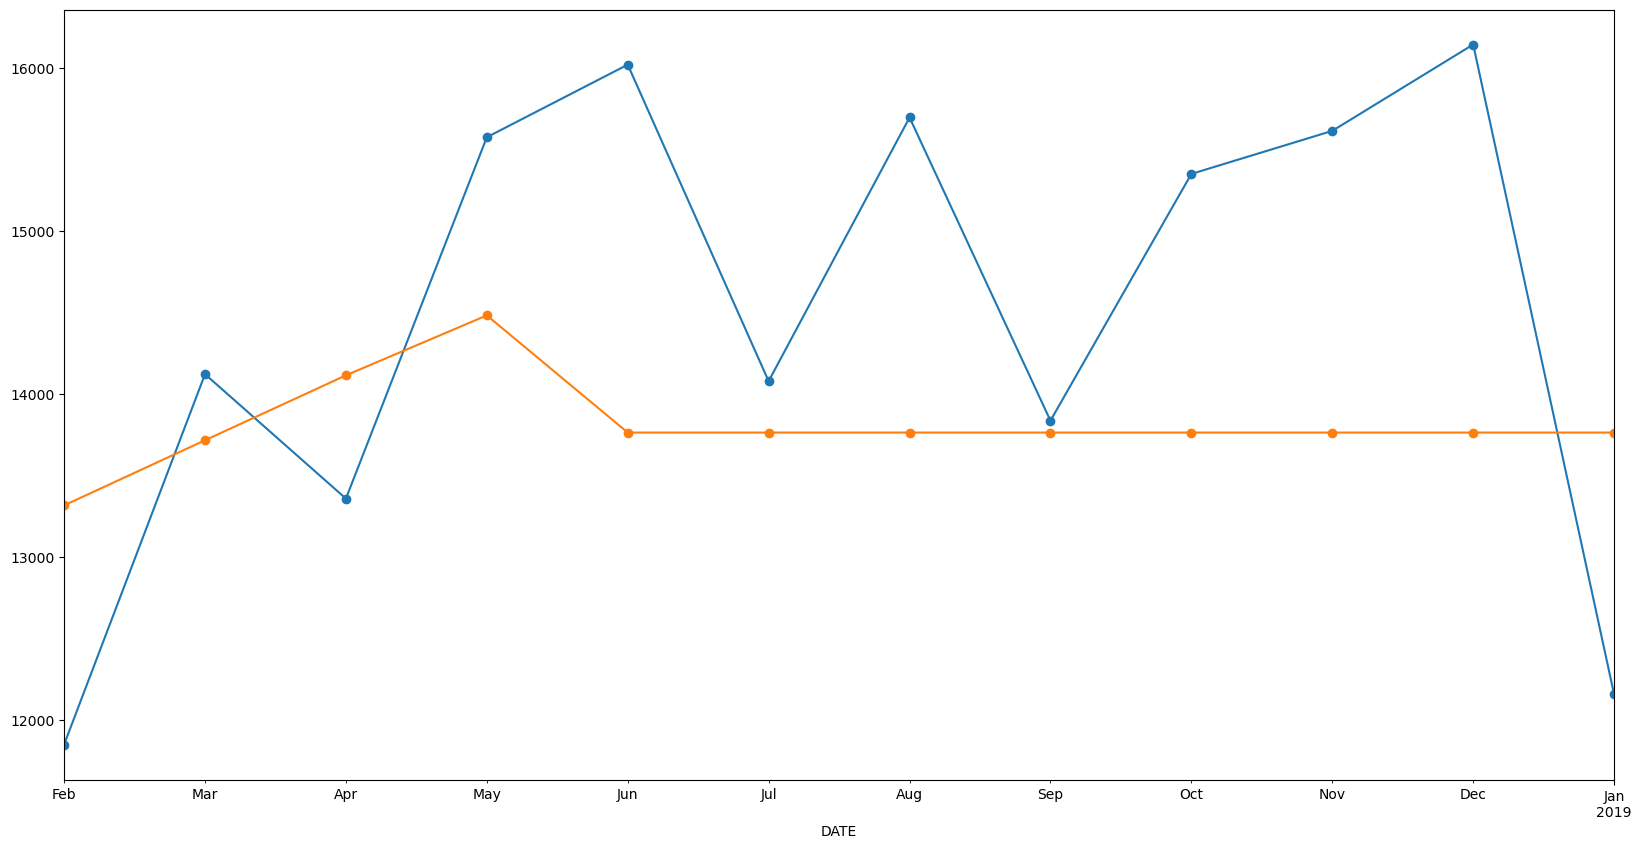

In [154]:
model = SARIMAX(train_x_st.Sales, order=(0, 0, 5))  # MA model
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

For choosing the right combination of p and q: https://otexts.com/fpp3/arima-r.html

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 862.77
RMSE : 1004.162
MAPE: 5.842


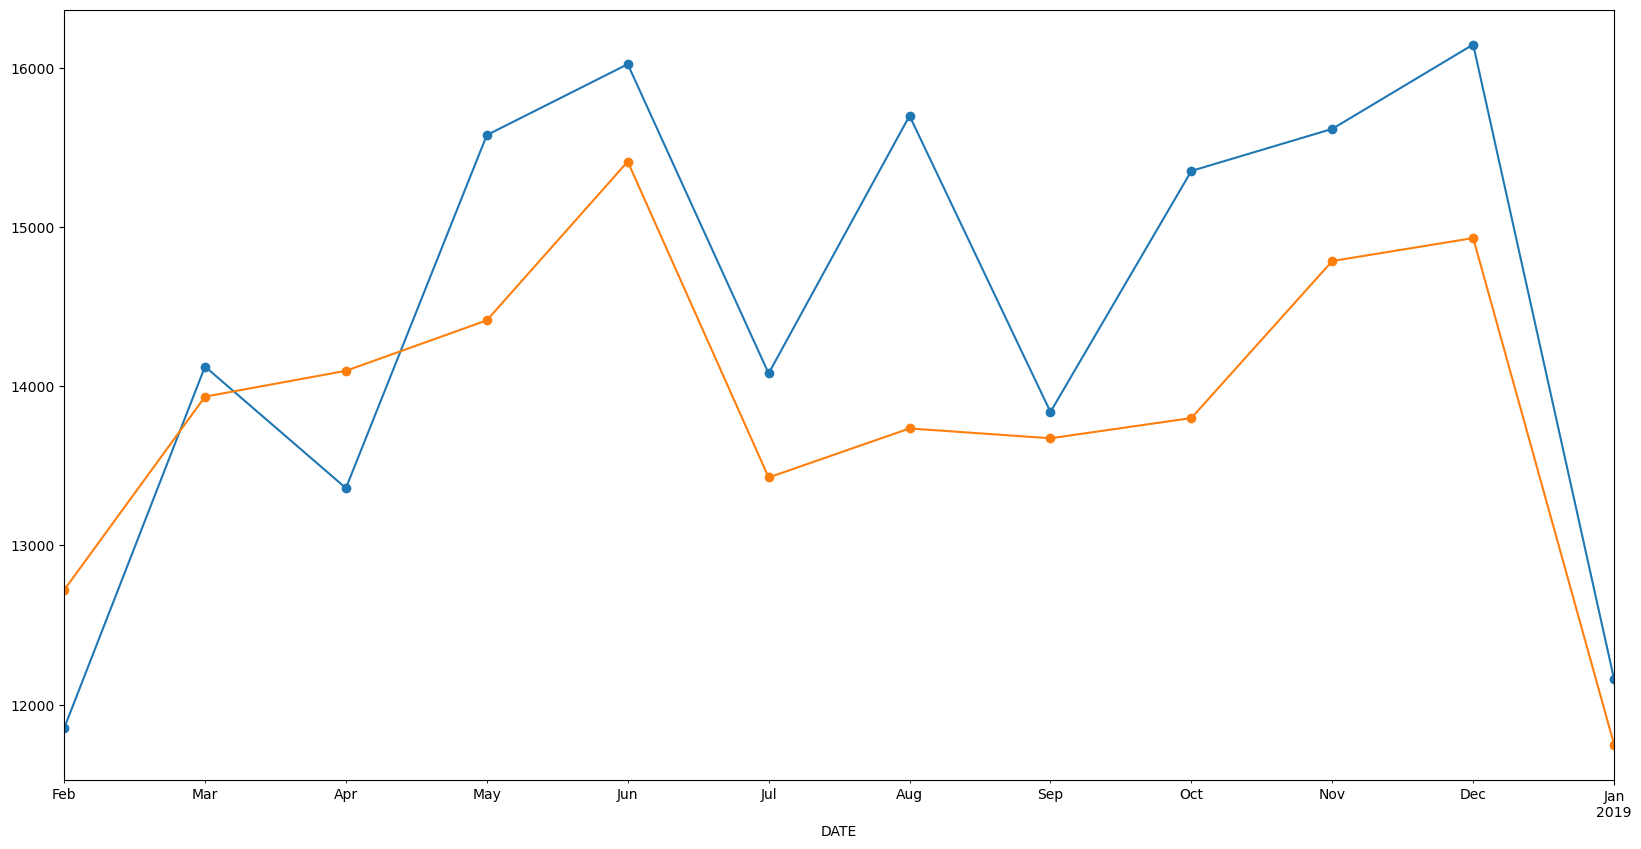

In [156]:
model = SARIMAX(train_x_st.Sales, order=(10, 0, 10))    # ARMA model
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 889.223
RMSE : 1031.066
MAPE: 6.013


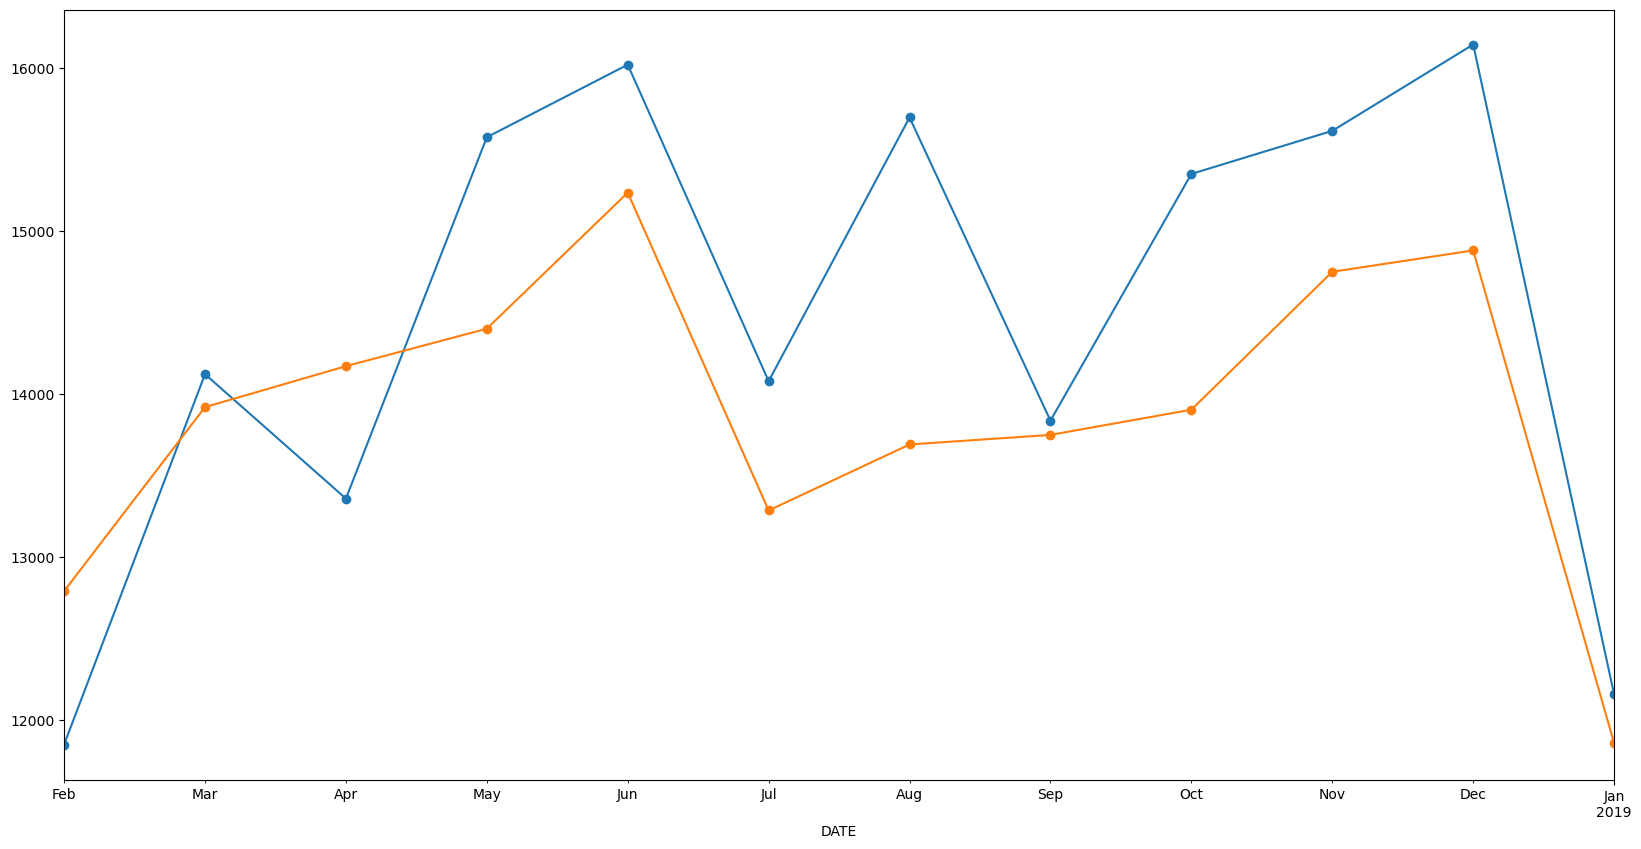

In [157]:
# ARIMA, we're taking a non stationary time series here since we checked that the differenced time series will be stationary at order 1.
# Also, we don't have to integrate back the time series. It happens automatically in ARIMA.

# we can have a for loop for different values of p and q and choose the one that fits.

model = SARIMAX(train_x.Sales, order=(10, 1, 10))   
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

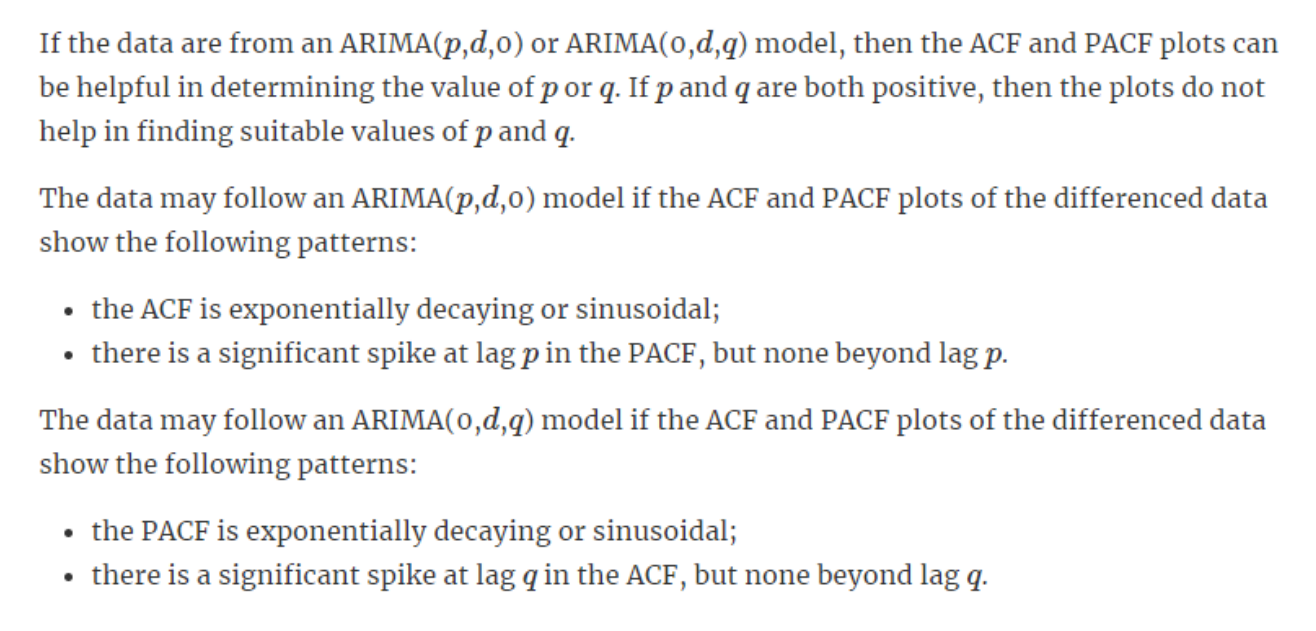

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  205
Model:             SARIMAX(10, 1, 10)   Log Likelihood               -1681.296
Date:                Fri, 01 Sep 2023   AIC                           3404.591
Time:                        23:27:55   BIC                           3474.272
Sample:                    01-01-2001   HQIC                          3432.778
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3496      0.366      0.955      0.340      -0.368       1.067
ar.L2         -0.9682      0.325     -2.982      0.003      -1.605      -0.332
ar.L3         -0.0271      0.441     -0.062      0.951      -0.891       0.837
ar.L4         -0.3472      0.226     -1.537      0.124      -0.790       0.096
ar.L5         -0.7153      0.201     -3.558      0.000      -1.109      -0.321
ar.L6          0.3000      0.196      1.531      0.126      -0.084       0.684
ar.L7         -1.0338      0.234     -4.419      0.000      -1.492      -0.575
ar.L8          0.2504      0.416      0.602      0.547      -0.565       1.066
ar.L9         -0.6584      0.260     -2.530      0.011      -1.168      -0.148
ar.L10        -0.3356      0.279     -1.205      0.228      -0.882       0.210
ma.L1         -1.2528      0.399     -3.141      0.002      -2.035      -0.471
ma.L2          1.4684      0.685      2.144      0.032       0.126       2.811
ma.L3         -0.9597      0.873     -1.099      0.272      -2.671       0.752
ma.L4          0.5504      0.873      0.630      0.528      -1.161       2.262
ma.L5          0.3062      0.897      0.342      0.733      -1.451       2.064
ma.L6         -0.8954      0.799     -1.121      0.262      -2.461       0.670
ma.L7          1.3339      0.732      1.823      0.068      -0.101       2.768
ma.L8         -1.1624      0.683     -1.701      0.089      -2.502       0.177
ma.L9          0.9795      0.505      1.939      0.052      -0.010       1.969
ma.L10        -0.3134      0.312     -1.006      0.314      -0.924       0.297
sigma2      1.313e+06   6.46e-06   2.03e+11      0.000    1.31e+06    1.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                57.15
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.56
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.59e+26. Standard errors may be unstable.
"""

It tries to minimize AIC and BIC values.

If you have any questions, get in touch with me [**here**](https://linktr.ee/khushalkumar31)